## Telecom Churn Case Study
<font color = blue>**Shreyansh Behani** </font><br>
<font color = blue>**Ramanuja Dwarakinath** </font><br>


### Problem Statement
***Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.***

In [193]:
# Import all the required libraries 

import numpy as np # Linear Algebra
import pandas as pd # DataFrame 
import matplotlib.pyplot as plt # Visualisation
import seaborn as sns # Visualisation

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.decomposition import PCA, IncrementalPCA

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import metrics

import datetime
import re 

import warnings
warnings.filterwarnings("ignore")

In [194]:
pd.set_option("display.max_columns", 500)

# Reading and uploading dataset
tele = pd.read_csv("telecom_churn_data.csv")

# Reading data set to get feel of it 
tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [195]:
tele.shape

(99999, 226)

In [196]:
# Checking missing values of the dataset 
missing  = tele.isnull().sum()/len(tele)
missing_count = missing[missing>0]
print(missing_count.sort_values())

last_date_of_month_7        0.006010
loc_og_t2o_mou              0.010180
std_og_t2o_mou              0.010180
loc_ic_t2o_mou              0.010180
last_date_of_month_8        0.011000
                              ...   
night_pck_user_6            0.748467
count_rech_2g_6             0.748467
date_of_last_rech_data_6    0.748467
fb_user_6                   0.748467
count_rech_3g_6             0.748467
Length: 166, dtype: float64


A lot of variables have missing values more than 50%. Analyzing these variables further to make sure dropping these wouldn't cause any problem for the modelling. 

In [197]:
# For features having missing values greater than 50% we see the description
missing_count_50 = missing[missing>0.5]
tele[missing_count_50.index].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
count,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.00000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,2.463802,2.666419,2.651999,2.441170,126.393392,126.729459,125.717301,124.94144,1.864668,2.044699,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315,89.555057,89.384120,91.173849,100.264116,86.398003,85.914450,86.599478,93.712026,0.025086,0.023034,0.020844,0.015971,0.914404,0.908764,0.890808,0.860968
std,2.789128,3.031593,3.074987,2.516339,108.477235,109.765267,109.437851,111.36376,2.570254,2.768332,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286,193.124653,195.893924,188.180936,216.291992,172.767523,176.379871,168.247852,171.384224,0.156391,0.150014,0.142863,0.125366,0.279772,0.287950,0.311885,0.345987
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000,-30.820000,-26.040000,-24.490000,-71.090000,-35.830000,-15.480000,-55.830000,-45.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,25.000000,25.000000,25.000000,25.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,145.000000,145.000000,145.000000,145.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000,0.480000,0.420000,0.880000,2.605000,10.830000,8.810000,9.270000,14.800000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,177.000000,177.000000,179.000000,179.00000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000,122.070000,119.560000,122.070000,140.010000,122.070000,122.070000,122.070000,140.010000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,61.000000,54.000000,60.000000,84.000000,1555.000000,1555.000000,1555.000000,1555.00000,42.000000,48.000000,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000,6362.280000,4980.900000,3716.900000,13884.310000,6433.760000,4809.360000,3483.170000,3467.170000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
# if total rech data of months and avg amount of data for months have same null value index
tele[['total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_data_7', 'av_rech_amt_data_7', 'total_rech_data_8','av_rech_amt_data_8',
     'total_rech_data_9', 'av_rech_amt_data_9']]

,total_rech_data_6,av_rech_amt_data_6,total_rech_data_7,av_rech_amt_data_7,total_rech_data_8,av_rech_amt_data_8,total_rech_data_9,av_rech_amt_data_9
0,1.0,252.0,1.0,252.0,1.0,252.0,NaN,NaN
1,NaN,NaN,1.0,154.0,2.0,50.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,46.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
99994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,2.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN
99997,3.0,583.0,2.0,358.0,4.0,716.0,4.0,862.0


In [199]:
# We will impute 0 in the above columns 
# We can consider these null values as 0
data_cols = ['total_rech_data_6', 'av_rech_amt_data_6', 'total_rech_data_7', 'av_rech_amt_data_7', 'total_rech_data_8','av_rech_amt_data_8',
             'total_rech_data_9', 'av_rech_amt_data_9']

tele[data_cols] = tele[data_cols].fillna(0)

tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [200]:
tele.shape

(99999, 226)

In [201]:
# Dropping the remaining columns with 50% and more of missing values
rem_missing =  tele.isnull().sum()/len(tele)
rem_missing_50 = rem_missing[rem_missing>0.5]

tele.drop(rem_missing_50.index, axis=1, inplace=True)

tele.shape

(99999, 194)

In [202]:
# Checking the remaining columns which have missing values 

missing_10 = tele.isnull().sum()/len(tele)
missing_10_cols =  missing_10[missing_10>0]

# Check description of the missing columns to see if the values can be imputed 
tele[missing_10_cols.index].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9
count,98981.0,98981.0,98981.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000
mean,0.0,0.0,0.0,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.950013,7.149898,7.292981,6.343841,13.911337,9.818732,9.971890,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,0.0,0.0,0.0,0.0,168.261218,175.221436,174.191498,169.664466,0.798277,0.776572,0.791247,0.723892,3.916811,4.978279,5.053769,4.412767,0.454157,0.030235,0.033372,0.047456,47.922365,47.990520,47.211362,46.281794,107.475650,107

In [203]:
# Dropping the columns which have similar type of values in the set 
# And mobile_number feature as it is "Customer Id" and don't play any significant role in modelling
# Some Columns have only one value '0' we wil also drop them as while modelling they will become redundant
cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'circle_id',
        'mobile_number', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6','std_og_t2c_mou_7',
       'std_og_t2c_mou_8','std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

tele.drop(cols, axis=1, inplace=True)

tele.shape

(99999, 177)

In [204]:
# For remaining date columns we will impute the missing values with mode imputation
# As we can see the most number of recharges are on the last day of the month 
tele.date_of_last_rech_6 = tele.date_of_last_rech_6.fillna("6/30/2014")
tele.date_of_last_rech_7 = tele.date_of_last_rech_7.fillna("7/31/2014")
tele.date_of_last_rech_8 = tele.date_of_last_rech_8.fillna("8/31/2014")
tele.shape

(99999, 177)

In [205]:
# Split the date remaining date columns as Iterative imputer only takes numerical value 
# After value imputation we will combine the dataset again

tele_date = tele[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']]


tele_num = tele.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9'], axis=1)

print(tele_date.shape)
print(tele_num.shape)


(99999, 4)
(99999, 173)


In [206]:
# Imputation of missing values using IterativeImputer

#imputer = IterativeImputer(max_iter=10, random_state=100)
imputer = IterativeImputer(max_iter=10, verbose=0)

tele_num1 = imputer.fit_transform(tele_num)

In [207]:
type(tele_num1)

numpy.ndarray

In [208]:
# Creating dataframe 

tele_num_2 = pd.DataFrame(tele_num1)

tele_num_2.columns = tele_num.columns

tele_num_2.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,197.385,214.816,213.803,21.100,131.601765,128.082266,0.00,134.875536,198.480247,196.388168,0.00,188.124232,17.614929,-10.423571,0.00,16.742717,23.827243,18.373219,0.00,13.82431,47.101468,46.476071,0.00,44.585135,93.342182,91.396265,0.00,90.461789,3.732302,3.799258,0.00,3.59916,13.830798,12.302741,0.00,1.777995,144.177895,141.693994,0.00,138.649865,79.828674,83.304339,0.00,82.343588,87.301897,90.801326,0.00,86.277048,1.121046,1.123088,0.00,1.012247,168.251249,175.232813,0.00,169.634236,0.799387,0.777127,0.0,0.724858,3.909497,4.952425,0.00,4.402068,-317.100921,-322.642695,0.0,-313.408169,0.00,0.00,0.00,0.00,47.92708,47.990319,0.16,46.275536,107.471091,107.12337,4.13,106.161836,12.274046,13.533318,1.15,11.542604,167.672266,168.655214,5.44,163.983388,9.565921,10.010929,0.00,9.433304,20.727493,21.660721,0.00,19.613083,2.344933,2.600564,0.00,1.946443,32.638503,34.271315,0.00,30.993378,0.00,0.00,5.44,0.00,-0.518482,0.005904,0.0,-0.002684,7.459902,8.333861,0.0,8.061481,-207.244164,-211.264917,0.0,-203.029656,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58
1,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.740000,99.840000,304.76,53.760000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00000,23.880000,74.560000,7.68,18.340000,11.

In [209]:
# Combinig the two datasets again

df = pd.concat([tele_num_2, tele_date], axis=1)

In [210]:
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9
0,197.385,214.816,213.803,21.100,131.601765,128.082266,0.00,134.875536,198.480247,196.388168,0.00,188.124232,17.614929,-10.423571,0.00,16.742717,23.827243,18.373219,0.00,13.82431,47.101468,46.476071,0.00,44.585135,93.342182,91.396265,0.00,90.461789,3.732302,3.799258,0.00,3.59916,13.830798,12.302741,0.00,1.777995,144.177895,141.693994,0.00,138.649865,79.828674,83.304339,0.00,82.343588,87.301897,90.801326,0.00,86.277048,1.121046,1.123088,0.00,1.012247,168.251249,175.232813,0.00,169.634236,0.799387,0.777127,0.0,0.724858,3.909497,4.952425,0.00,4.402068,-317.100921,-322.642695,0.0,-313.408169,0.00,0.00,0.00,0.00,47.92708,47.990319,0.16,46.275536,107.471091,107.12337,4.13,106.161836,12.274046,13.533318,1.15,11.542604,167.672266,168.655214,5.44,163.983388,9.565921,10.010929,0.00,9.433304,20.727493,21.660721,0.00,19.613083,2.344933,2.600564,0.00,1.946443,32.638503,34.271315,0.00,30.993378,0.00,0.00,5.44,0.00,-0.518482,0.005904,0.0,-0.002684,7.459902,8.333861,0.0,8.061481,-207.244164,-211.264917,0.0,-203.029656,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.4,0.0,101.20,3.58,6/21/2014,7/16/2014,8/8/2014,9/28/2014
1,34.047,355.074,268.321,86.285,24.110000,78.680000,7.68,18.340000,15.740000,99.840000

In [211]:
df.shape

(99999, 177)

### Filtering out High Value Customers

In [212]:
# For filtering out High value customers

# Total Recharge amount of data columns

df['Total_data_amt_6'] = (df.total_rech_data_6)*(df.av_rech_amt_data_6)
df['Total_data_amt_7'] = (df.total_rech_data_7)*(df.av_rech_amt_data_7)



In [213]:
# Average amount of data recharge per customer in good phase

df['Av_amt_data_gp'] =  (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

# Average amount of call rech per customer in good phase

df['Av_amt_rech_gp'] = (df.total_rech_amt_6 + df.total_rech_amt_7)/2

df['Avg_rech_amt'] =  (df['Av_amt_data_gp'] + df['Av_amt_rech_gp'])/2

q1 = df['Avg_rech_amt'].quantile(0.7)

df_hvc = df.loc[(df['Avg_rech_amt']>=q1), :]

df_hvc.shape

(30011, 182)

In [214]:
#looking at the head of high value customers df. 
df_hvc.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,Total_data_amt_6,Total_data_amt_7,Av_amt_data_gp,Av_amt_rech_gp,Avg_rech_amt
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,129.106327,453.43,567.16,325.91,174.101856,16.23,33.49,31.64,19.430391,23.74,12.59,38.06,-7.343799,51.39,31.38,40.28,44.584441,308.63,447.38,162.28,90.462693,62.13,55.14,53.23,3.595056,0.0,0.0,0.00,0.672239,422.16,533.91,255.79,138.649968,4.30,23.29,12.01,82.343214,49.89,31.76,49.14,86.27644,6.66,20.08,16.68,1.013507,60.86,75.14,77.84,169.637497,0.0,0.18,10.01,0.724758,4.50,0.00,6.50,4.402057,0.00,0.0,0.0,-313.411288,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.275979,217.56,221.49,121.19,106.162488,152.16,101.46,39.53,11.535031,427.88,355.23,188.04,163.982325,36.89,11.83,30.39,9.433256,91.44,126.99,141.33,19.612908,52.19,34.24,22.21,1.944336,180.54,173.08,193.94,30.99893,626.46,558.04,428.74,0.00,0.21,0.0,0.0,-0.002532,2.06,14.53,31.59,8.06134,15.74,15.19,15.14,-203.045338,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0.0,0.0,1185.0,1185.0,1185.0
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.460000,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,26.13000

#### Tagging Churn/ Non-Churn

In [215]:
#function to tag churn/non-churn
def tag_churn(row):
    if (row['total_ic_mou_9']==0 and row['total_og_mou_9']==0 and row['vol_2g_mb_9']==0 and row['vol_3g_mb_9']==0):
        churn = 1
    else:
        churn = 0
    return churn

churn_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

df_hvc['Churn'] = df_hvc[churn_cols].apply(tag_churn, axis=1)

df_hvc.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,Total_data_amt_6,Total_data_amt_7,Av_amt_data_gp,Av_amt_rech_gp,Avg_rech_amt,Churn
7,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,129.106327,453.43,567.16,325.91,174.101856,16.23,33.49,31.64,19.430391,23.74,12.59,38.06,-7.343799,51.39,31.38,40.28,44.584441,308.63,447.38,162.28,90.462693,62.13,55.14,53.23,3.595056,0.0,0.0,0.00,0.672239,422.16,533.91,255.79,138.649968,4.30,23.29,12.01,82.343214,49.89,31.76,49.14,86.27644,6.66,20.08,16.68,1.013507,60.86,75.14,77.84,169.637497,0.0,0.18,10.01,0.724758,4.50,0.00,6.50,4.402057,0.00,0.0,0.0,-313.411288,487.53,609.24,350.16,0.00,58.14,32.26,27.31,46.275979,217.56,221.49,121.19,106.162488,152.16,101.46,39.53,11.535031,427.88,355.23,188.04,163.982325,36.89,11.83,30.39,9.433256,91.44,126.99,141.33,19.612908,52.19,34.24,22.21,1.944336,180.54,173.08,193.94,30.99893,626.46,558.04,428.74,0.00,0.21,0.0,0.0,-0.002532,2.06,14.53,31.59,8.06134,15.74,15.19,15.14,-203.045338,5.0,5.0,7.0,3.0,1580.0,790.0,3638.0,0.0,1580.0,790.0,1580.0,0.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0.0,0.0,1185.0,1185.0,1185.0,1
8,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.460000,94.66,80.63,136.48,108.710000,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.000000,297.13,217.59,12.49,

In [216]:
# Dropping Columns of month 9 after tagging the churns and non-churns. 
_9_cols = []
for cols in df_hvc.columns:
    if re.search("_9", cols):
        _9_cols.append(cols)
        
df_new = df_hvc.drop(_9_cols, axis=1)
df_new.drop('sep_vbc_3g', axis=1, inplace=True)
# Shape of the data set
df_new.shape

(30011, 139)

In [217]:
df_new.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,Total_data_amt_6,Total_data_amt_7,Av_amt_data_gp,Av_amt_rech_gp,Avg_rech_amt,Churn
7,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,6/27/2014,7/25/2014,8/26/2014,0.0,0.0,1185.0,1185.0,1185.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,6/25/2014,7/31/2014,8/30/2014,0.0,354.0,519.0,519.0,519.0,0
13,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,

In [218]:
list(df_new.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [219]:
df_new.shape

(30011, 139)

In [220]:
# Removing columns from which High value customers were filtered 
df_new.drop(['Av_amt_data_gp','Av_amt_rech_gp'], axis=1, inplace=True)

In [221]:
df_new.shape

(30011, 137)

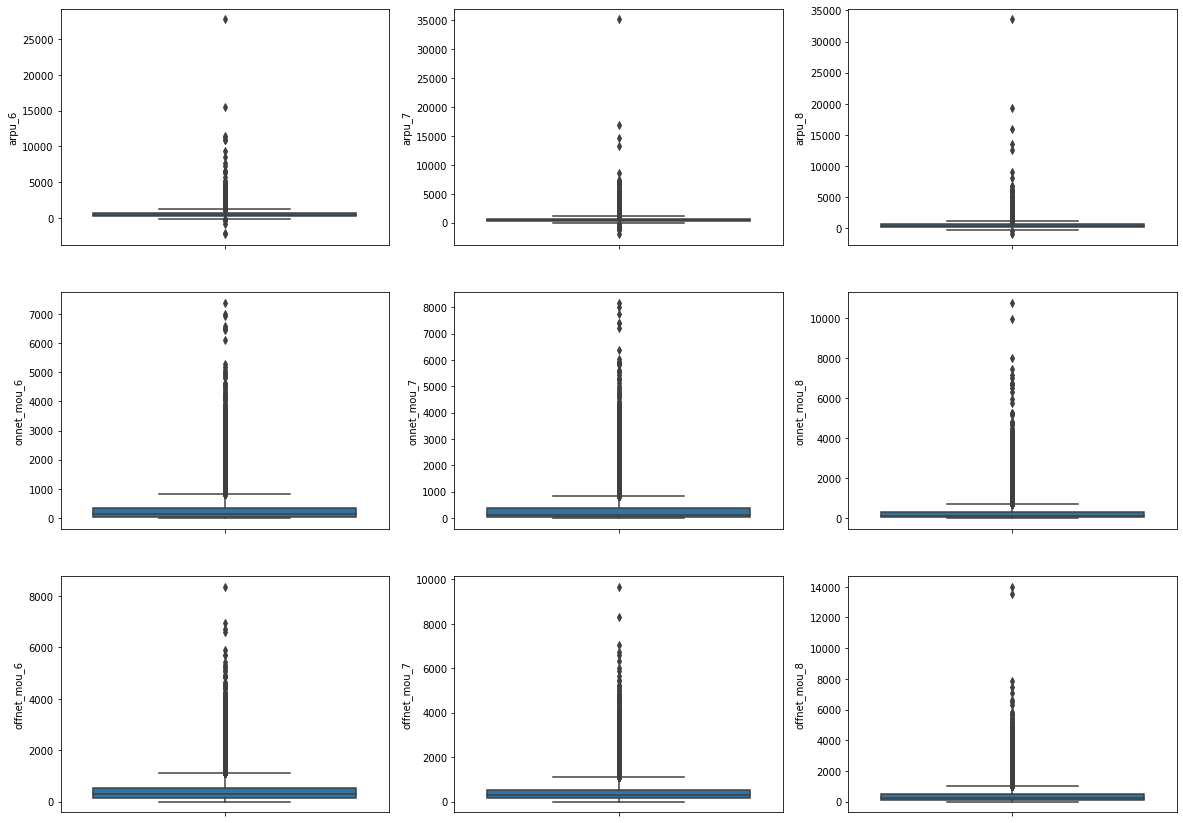

In [222]:
# Outliers analysis 
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.boxplot(y=df_new.arpu_6, hue=df_new.Churn)

plt.subplot(4,3,2)
sns.boxplot(y=df_new.arpu_7, hue=df_new.Churn)

plt.subplot(4,3,3)
sns.boxplot(y=df_new.arpu_8, hue=df_new.Churn)

plt.subplot(4,3,4)
sns.boxplot(y=df_new.onnet_mou_6, hue=df_new.Churn)

plt.subplot(4,3,5)
sns.boxplot(y=df_new.onnet_mou_7, hue=df_new.Churn)

plt.subplot(4,3,6)
sns.boxplot(y=df_new.onnet_mou_8, hue=df_new.Churn)

plt.subplot(4,3,7)
sns.boxplot(y=df_new.offnet_mou_6, hue=df_new.Churn)

plt.subplot(4,3,8)
sns.boxplot(y=df_new.offnet_mou_7, hue=df_new.Churn)

plt.subplot(4,3,9)
sns.boxplot(y=df_new.offnet_mou_8, hue=df_new.Churn)

plt.show()


**As seen from the above plots, lot of features do have significant outlier presence. If we remove outliers for every column we will end up loosing large chunk of data as the dataset also has huge classs imbalnce, which may affect the predictive power of the model  so we will cap the outliers instead of getting rid of them.**

In [223]:
df_new.shape

(30011, 137)

In [224]:
# Split the data from object type and date columns before outliers capping
df_dates = df_new[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']]
df_numerical = df_new.drop(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], axis=1)
# Outliers capping 
for cols in df_numerical.columns:
    percentiles = df_numerical[cols].quantile([0.01, 0.99]).values
    df_numerical[cols][df_numerical[cols] <= percentiles[0]] = percentiles[0]
    df_numerical[cols][df_numerical[cols] >= percentiles[1]] = percentiles[1]


In [225]:
df_numerical.shape

(30011, 134)

In [226]:
df_new.shape

(30011, 137)

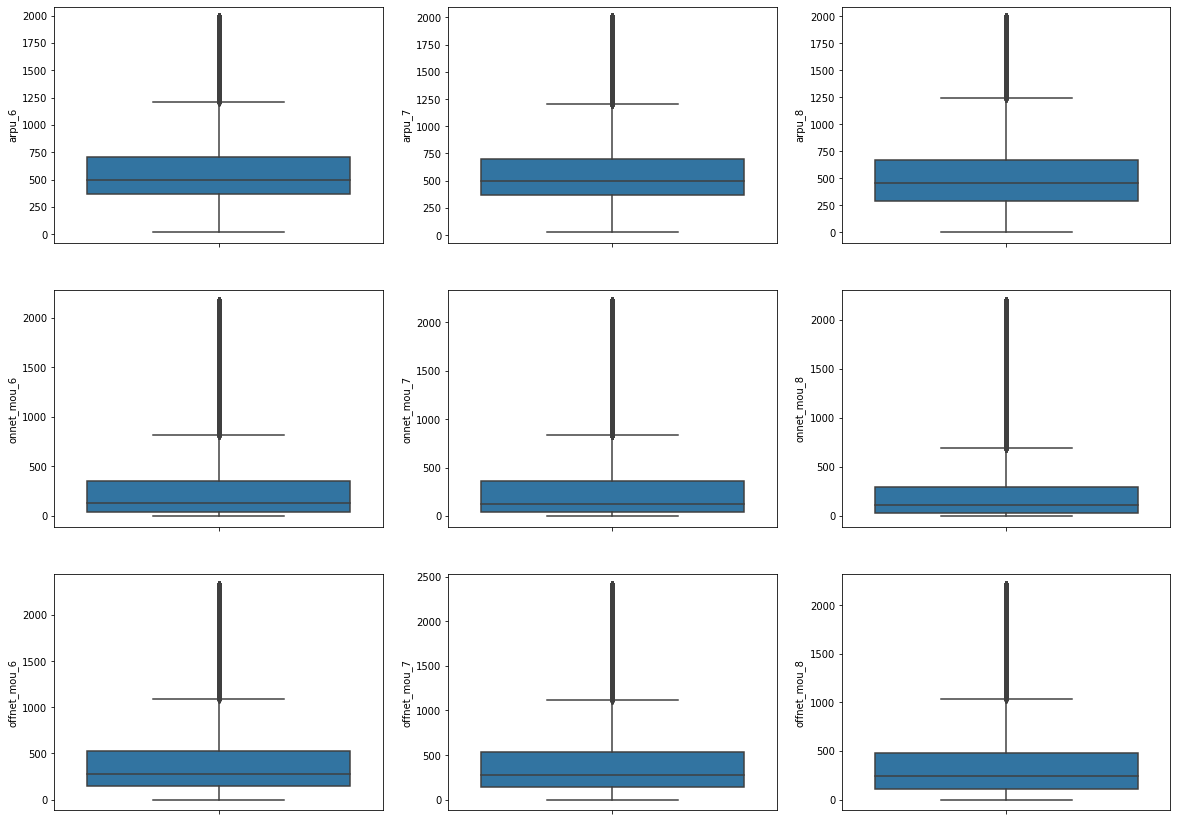

In [227]:
# Outliers analysis after capping
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.boxplot(y=df_numerical.arpu_6)

plt.subplot(4,3,2)
sns.boxplot(y=df_numerical.arpu_7)

plt.subplot(4,3,3)
sns.boxplot(y=df_numerical.arpu_8)

plt.subplot(4,3,4)
sns.boxplot(y=df_numerical.onnet_mou_6)

plt.subplot(4,3,5)
sns.boxplot(y=df_numerical.onnet_mou_7)

plt.subplot(4,3,6)
sns.boxplot(y=df_numerical.onnet_mou_8)

plt.subplot(4,3,7)
sns.boxplot(y=df_numerical.offnet_mou_6)

plt.subplot(4,3,8)
sns.boxplot(y=df_numerical.offnet_mou_7)

plt.subplot(4,3,9)
sns.boxplot(y=df_numerical.offnet_mou_8)

plt.show()


**Outliers are capped without loosing any data. Evidently, the whiskers for all the box plots have widened indicating capping.**

In [228]:
# Combining the data set 

df_1 =  pd.concat([df_numerical, df_dates], axis=1)

df_1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Total_data_amt_6,Total_data_amt_7,Avg_rech_amt,Churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,1069.180,1349.8500,1987.9344,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2341.9,1000.0,790.0,951.0,0.0,0.0,619.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,1185.0,1,6/27/2014,7/25/2014,8/26/2014
8,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,354.0,519.0,0,6/25/2014,7/31/2014,8/30/2014
13,492.846,205.6710,593.2600,501.76,108.39,534.24,413.31,119.280,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.

In [229]:
df_1.shape

(30011, 137)

### Exploratory Data Analysis

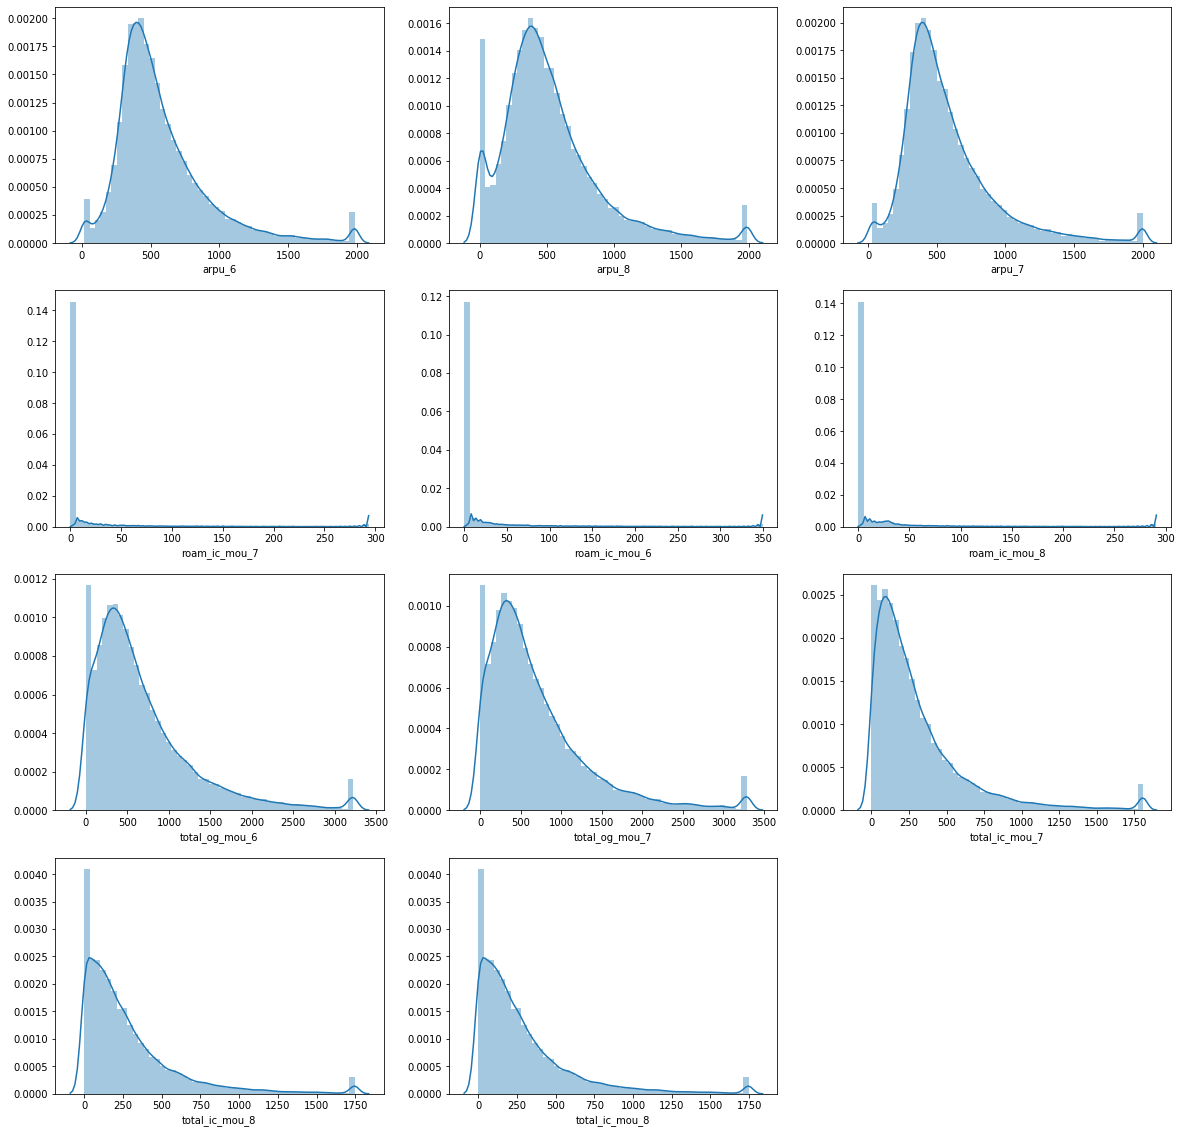

In [230]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
sns.distplot(df_1.arpu_6)

plt.subplot(4,3,2)
sns.distplot(df_1.arpu_8)

plt.subplot(4,3,3)
sns.distplot(df_1.arpu_7)

plt.subplot(4,3,4)
sns.distplot(df_1.roam_ic_mou_7)

plt.subplot(4,3,5)
sns.distplot(df_1.roam_ic_mou_6)

plt.subplot(4,3,6)
sns.distplot(df_1.roam_ic_mou_8)

plt.subplot(4,3,7)
sns.distplot(df_1.total_og_mou_6)

plt.subplot(4,3,8)
sns.distplot(df_1.total_og_mou_7)

plt.subplot(4,3,9)
sns.distplot(df_1.total_ic_mou_7)

plt.subplot(4,3,10)
sns.distplot(df_1.total_ic_mou_8)

plt.subplot(4,3,11)
sns.distplot(df_1.total_ic_mou_8)


plt.show()

**We can see all of these features have similar distribution and hence they are related to each other in some way. So, we would definitely have to deal with multicollinearity during our model building.**

## Feature Engineering 

In [231]:
df_1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Total_data_amt_6,Total_data_amt_7,Avg_rech_amt,Churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,1069.180,1349.8500,1987.9344,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2341.9,1000.0,790.0,951.0,0.0,0.0,619.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,1185.0,1,6/27/2014,7/25/2014,8/26/2014
8,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,354.0,519.0,0,6/25/2014,7/31/2014,8/30/2014
13,492.846,205.6710,593.2600,501.76,108.39,534.24,413.31,119.280,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.

If the difference in the service features of the average of good phase and action phase is small, then that could mean that the customer has had activity recently, which could imply that there is less chance of the customer to churn. On the other hand,  if the difference is large, then that could mean that the customer hasn't had much activity recently, which could imply that there is high chance of customer churn. So, we shall derive a new features that are more meaning using the existing columns thru feature engineering. 

In [232]:
df_1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Total_data_amt_6,Total_data_amt_7,Avg_rech_amt,Churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,1069.180,1349.8500,1987.9344,57.84,54.68,52.29,453.43,567.160,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,2341.9,1000.0,790.0,951.0,0.0,0.0,619.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,1185.0,1,6/27/2014,7/25/2014,8/26/2014
8,378.721,492.2230,137.3620,413.69,351.03,35.08,94.66,80.630,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,3.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0.0,354.0,519.0,0,6/25/2014,7/31/2014,8/30/2014
13,492.846,205.6710,593.2600,501.76,108.39,534.24,413.31,119.280,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.

In [233]:
df_1.shape

(30011, 137)

In [234]:
# Average revenue per user per month
df_1['arpu_pm'] = (df_1.arpu_6 + df_1.arpu_7 + df_1.arpu_8)/3

# difference Incoming call mou per month
df_1['diff_ic_mou'] = (df_1.total_ic_mou_6 + df_1.total_ic_mou_7)/2 - df_1.total_ic_mou_8

# difference outgoing call mou per month 
df_1['diff_oc_mou'] = (df_1.total_og_mou_6 + df_1.total_og_mou_7)/2 - df_1.total_og_mou_8

#  Average Total recharge amt of data 
df_1["Av_tot_amt_data"] = ((df_1.total_rech_data_6*df_1.av_rech_amt_data_6) + (df_1.total_rech_data_7*df_1.av_rech_amt_data_7) + 
                           (df_1.total_rech_data_8*df_1.av_rech_amt_data_8))/3

# Average total recharge call
df_1['Av_tot_rech'] = (df_1.total_rech_amt_6 + df_1.total_rech_amt_7 + df_1.total_rech_amt_8)/3

# difference roaming incoming call 
df_1['diff_roam_ic_mou'] = (df_1.roam_ic_mou_6 + df_1.roam_ic_mou_7)/2 - df_1.roam_ic_mou_8

# difference roaming outgoing call 
df_1['diff_roam_og_mou'] = (df_1.roam_og_mou_6 + df_1.roam_og_mou_7)/2 - df_1.roam_og_mou_8

# Average Recharge number per month
df_1['Av_rech_number_pm'] = (df_1.total_rech_num_6 + df_1.total_rech_num_7 + df_1.total_rech_num_8)/3

# As we have created new features we don't require old features from which these new features are formed

cols_drop = ['arpu_6', 'arpu_7', 'arpu_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_og_mou_6',
            'total_og_mou_7', 'total_og_mou_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
            'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','total_rech_amt_6','total_rech_amt_7',
            'total_rech_amt_8', 'Total_data_amt_6', 'Total_data_amt_7', 'Avg_rech_amt', 'total_rech_num_6','total_rech_num_7',
            'total_rech_num_8', 'roam_ic_mou_6', 'roam_ic_mou_7','roam_ic_mou_8', 'roam_og_mou_6','roam_og_mou_7',
            'roam_og_mou_8']

df_1.drop(cols_drop, axis=1, inplace=True)

In [235]:
df_1.shape

(30011, 115)

In [236]:
df_1.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm
7,57.84,54.68,52.29,453.43,567.160,325.91,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,1000.0,790.0,951.0,0.0,0.0,619.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1,6/27/2014,7/25/2014,8/26/2014,1468.988133,163.510,198.225,0.0,1570.633333,-6.780,-19.895,5.666667
8,413.69,351.03,35.08,94.66,80.630,136.48,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,90.0,154.0,30.0,50.0,0.0,10.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0,6/25/2014,7/31/2014,8/30/2014,336.102000,49.635,298.450,187.0,386.000000,0.000,0.000,18.000000
13,501.76,108.39,534.24,413.31,119.280,482.46,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,239.60,62.11,249.888,20.708,16.24,21.44,110.0,110.0,130.0,110.0,50.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0,6/20/2014,7/22/2014,8/30/2014,430.592333,-573.935,-465.510,69.0,492.333333,11.775,20.180,7.000000
16,50.51,74.01,70.61,296.29,229.740,162.76,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,

**For dates column, we have performed feature engineering by calculating number of days since the last recharge with reference to 1st of Sep (since this month is the churn month). If the number of days since the last recharge is less, then the customer won't churn. If it's a large number, then the customer hasn't recharged for while and has high chances of churning.**

In [237]:
# For Date columns
df_1['date_of_last_rech_6'] = pd.to_datetime(df_1['date_of_last_rech_6'])
df_1['date_of_last_rech_7'] = pd.to_datetime(df_1['date_of_last_rech_7'])
df_1['date_of_last_rech_8'] = pd.to_datetime(df_1['date_of_last_rech_8'])

df_1['First day of september'] = "2014/09/01"

df_1['First day of september'] = pd.to_datetime(df_1['First day of september'])

# Days since last reacharge from september 1
df_1["Days_rech_6"] = df_1['First day of september'] - df_1.date_of_last_rech_6
df_1["Days_rech_7"] = df_1['First day of september'] - df_1.date_of_last_rech_7
df_1["Days_rech_8"] = df_1['First day of september'] - df_1.date_of_last_rech_8

cols = ['Days_rech_6', 'Days_rech_7', 'Days_rech_8']

df_cols_date = df_1[cols]

# Minimum number of days since last recharge
df_1['Days_since_last_recharge'] = df_cols_date.min(axis=1)

# Converting column in float or int type
df_1['Days_since_last_recharge'] = (df_1['Days_since_last_recharge'].dt.days)

df_1.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm,First day of september,Days_rech_6,Days_rech_7,Days_rech_8,Days_since_last_recharge
7,57.84,54.68,52.29,453.43,567.160,325.91,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,1000.0,790.0,951.0,0.0,0.0,619.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1,2014-06-27,2014-07-25,2014-08-26,1468.988133,163.510,198.225,0.0,1570.633333,-6.780,-19.895,5.666667,2014-09-01,66 days,38 days,6 days,6
8,413.69,351.03,35.08,94.66,80.630,136.48,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,90.0,154.0,30.0,50.0,0.0,10.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0,2014-06-25,2014-07-31,2014-08-30,336.102000,49.635,298.450,187.0,386.000000,0.000,0.000,18.000000,2014-09-01,68 days,32 days,2 days,2
13,501.76,108.39,534.24,413.31,119.280,482.46,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,239.60,62.11,249.888,20.708,16.24,21.44,110.0,110.0,130.0,110.0,50.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0,2014-06-20,2014-07-22,2014-08-30,430.592333,-573.935,-465.510,69.0,492.333333,11.775,20.180,7.000000,2014-09-01,73 days,41 days,2 days,2
16,50.51,74.01,70.61,296.29,229.740,162.76,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215

In [238]:
df_1.shape

(30011, 120)

In [239]:
# Dropping date columns
drop_dates = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','First day of september','Days_rech_6',
             'Days_rech_7','Days_rech_8']

df_1.drop(drop_dates, axis=1, inplace=True)

# Shape of the Dataset

df_1.shape

(30011, 113)

In [240]:
df_1.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Churn,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm,Days_since_last_recharge
7,57.84,54.68,52.29,453.43,567.160,325.91,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,0.21,0.0,0.0,2.06,14.53,31.590,15.740,15.19,15.14,1000.0,790.0,951.0,0.0,0.0,619.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1,1468.988133,163.510,198.225,0.0,1570.633333,-6.780,-19.895,5.666667,6
8,413.69,351.03,35.08,94.66,80.630,136.48,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,0.00,0.0,0.0,0.00,0.00,0.000,0.000,0.00,0.00,90.0,154.0,30.0,50.0,0.0,10.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315.0,21.03,910.65,122.16,0,336.102000,49.635,298.450,187.0,386.000000,0.000,0.000,18.000000,2
13,501.76,108.39,534.24,413.31,119.280,482.46,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,0.45,0.0,0.0,239.60,62.11,249.888,20.708,16.24,21.44,110.0,110.0,130.0,110.0,50.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2607.0,0.00,0.00,0.00,0,430.592333,-573.935,-465.510,69.0,492.333333,11.775,20.180,7.000000,2
16,50.51,74.01,70.61,296.29,229.740,162.76,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,276.86,229.83,211.78,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,87.99,151.73,82.44,0.00,0.0,0.0,0.00,0.00,0.230,0.000,0.00,0.00,110.0,110.0

In [241]:
# Data Imbalance 
print("Data Imbalance",round(df_1.Churn.sum()/len(df_1)*100,2))

Data Imbalance 8.64


**The dataset has high data imbalance (91:9). This needs to be handled before building the model.**

In [242]:
# Split the data set for training and testing

X = df_1.drop('Churn', axis=1)
y = df_1['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(24008, 112) (24008,)
(6003, 112) (6003,)


In [243]:
# Scaling the columns 
scaler = StandardScaler()
new_data = scaler.fit_transform(X_train)

new_data

array([[ 3.07293713,  2.38592247,  2.12595986, ..., -0.07360846,
         2.6057125 , -0.78886488],
       [-0.52932873, -0.55635556, -0.43487251, ..., -0.07360846,
        -0.64424   , -0.00378511],
       [-0.48804875, -0.48290446, -0.44979197, ..., -0.07360846,
        -0.7309054 ,  0.58502471],
       ...,
       [-0.64297853, -0.56710682, -0.56972442, ..., -0.07360846,
        -0.3409111 ,  0.19248483],
       [ 1.33319241,  0.95857344,  0.89326089, ..., -0.07360846,
         2.7357106 , -0.78886488],
       [-0.01136265, -0.36083481, -0.13039002, ..., -0.07360846,
        -0.210913  , -0.39632499]])

In [244]:
# Fitting PCA on the train set
pca = PCA(random_state=100)

pca.fit(new_data)

print("Explained Variance Ratio", pca.explained_variance_ratio_)

Explained Variance Ratio [1.11414942e-01 7.66364851e-02 6.42932433e-02 5.01853647e-02
 4.18164901e-02 4.14896751e-02 3.55993860e-02 2.93727683e-02
 2.77839020e-02 2.76812279e-02 2.49888500e-02 2.46770233e-02
 2.16695999e-02 2.12414902e-02 1.94712297e-02 1.71066550e-02
 1.57913382e-02 1.48182988e-02 1.41051776e-02 1.35602638e-02
 1.26759546e-02 1.20571547e-02 1.10882038e-02 1.09003917e-02
 1.06528695e-02 9.73061992e-03 9.59631609e-03 9.08637261e-03
 8.47816224e-03 7.93170770e-03 7.66811264e-03 7.42763559e-03
 7.27679542e-03 7.03382869e-03 6.70124962e-03 6.65893114e-03
 6.35242285e-03 6.10145488e-03 5.98086898e-03 5.76536058e-03
 5.62508826e-03 5.38064649e-03 5.14318432e-03 4.89610996e-03
 4.72420396e-03 4.57923500e-03 4.34429915e-03 4.24393029e-03
 4.13280791e-03 3.87305568e-03 3.72096573e-03 3.70196926e-03
 3.60376567e-03 3.31129204e-03 3.26393584e-03 3.15179741e-03
 3.08762299e-03 2.94910539e-03 2.86540263e-03 2.72288591e-03
 2.70792072e-03 2.67992220e-03 2.65195030e-03 2.61053550e-03

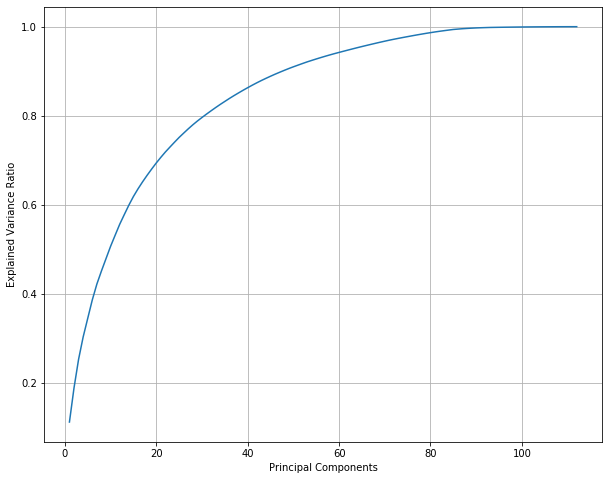

In [245]:
# Scree Plot

var_cum_sum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,8))
plt.plot(range(1, len(var_cum_sum)+1), var_cum_sum)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.grid(True)
plt.show()

**As seen from the above Screen plot, around 55 Principal Components can explain close to 90% of the variance in the data. So, we shall build the model using 55 PCs.**

In [246]:
# Incremental PCA with 55 Principlal components
pca_final = IncrementalPCA(n_components=55)

in_df = pca_final.fit_transform(new_data)

in_df

array([[-4.03212333,  5.30528604,  1.34507223, ...,  0.55886339,
         0.14033675,  0.07713312],
       [ 5.28671578, -2.56684372,  2.43927449, ..., -0.14065603,
         0.20504053,  0.3306529 ],
       [ 0.96245017, -1.6249643 , -1.91933464, ...,  0.28086746,
         0.09172984, -0.34571448],
       ...,
       [-2.87261498,  1.22256579,  0.86917361, ...,  0.38008971,
         0.36038037, -0.05330638],
       [-4.66391957,  0.50262539, -1.17133009, ...,  0.17539161,
         0.0250858 , -0.2149996 ],
       [ 7.21346343,  1.30938206, -4.8384777 , ...,  0.44920686,
         0.61029347, -0.39330849]])

In [247]:
# Creating Dataframe of Principal components
train_pca = pd.DataFrame(in_df)

train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,-4.032123,5.305286,1.345072,-2.073404,-0.229001,-4.461277,0.229251,0.243086,-0.640659,1.038762,-1.459119,-0.949458,-1.333911,1.587164,-1.401250,-0.174679,-0.113593,0.725776,0.123105,0.398989,0.778845,-0.517236,-0.118695,-1.038683,-0.053213,0.068092,0.101709,-0.345174,-0.611821,-0.290855,-0.160569,0.189684,-0.015221,0.683147,0.035762,-0.307000,-0.878819,-0.223146,-1.199523,-0.037343,-0.157846,-0.328548,0.234670,-0.160025,0.543766,-0.002947,0.743800,-0.045980,0.137006,-1.406922,0.038525,-0.010589,0.558863,0.140337,0.077133
1,5.286716,-2.566844,2.439274,-2.276840,0.712387,0.784933,1.427693,1.742605,-1.112149,2.104465,0.422666,-1.800547,-2.662094,-1.599396,3.780651,0.274088,0.698365,-2.566475,3.266161,0.321626,1.323070,-0.372298,-0.153582,-0.232370,0.165364,1.584343,-0.037040,0.113489,-0.520226,0.276940,-0.758945,-0.867108,1.332569,-0.882333,1.688314,0.115898,-0.869866,-0.452197,-0.463521,0.309041,0.072627,-0.042028,0.384285,-0.126228,-0.490186,0.841392,-0.373117,0.531913,0.595699,-0.093816,-1.869374,0.052717,-0.140656,0.205041,0.330653
2,0.962450,-1.624964,-1.919335,0.765845,0.345942,-0.410501,0.610697,-0.578743,-0.285387,-1.021932,-0.647433,2.287764,0.000190,0.129732,-0.086562,0.209079,-0.249399,-0.443272,0.965328,-0.277219,0.900283,-0.097037,-0.338744,0.034738,-0.261123,0.523658,-0.029822,-0.219249,0.108286,-0.185658,0.777885,0.374969,-0.307979,0.453690,-0.302969,-0.315468,0.269261,0.054749,0.179916,0.492230,-0.578732,1.672113,0.151805,-1.014556,-0.236399,0.140344,0.595549,0.801849,-0.044411,-0.066863,-0.032747,0.040640,0.280867,0.091730,-0.345714
3,2.964076,0.934612,-2.167703,-0.357227,-0.457227,1.796271,0.530445,-0.080581,0.380065,-3.294323,0.119806,-0.440308,-1.329321,1.266797,-1.279254,-0.356728,1.170060,-1.185543,-0.650509,1.513477,0.425478,-0.213147,0.281063,-0.484359,-0.191697,0.148102,0.083738,-0.475529,-0.405697,-1.118252,0.947113,-1.197174,0.087700,0.629795,-0.198397,1.100067,-0.672034,0.493937,0.105662,0.215066,-0.057755,-0.126550,0.067711,0.061478,0.204500,-0.465969,0.189776,0.071067,-0.074331,-0.169541,0.042033,-0.059431,0.237278,-0.057545,0.274141
4,-2.044357,-3.799002,-0.508918,-2.797812,7.787546,0.885264,-0.157115,5.039749,-0.246661,1.735735,2.732576,2.936507,-4.911915,-1.033490,1.455497,2.284675,0.445463,1.097594,-5.827622,-1.223324,-0.648224,-0.070388,0.212052,-0.071416,0.353467,-0.208206,0.736671,-0.018771,-0.723359,-0.304078,0.555208,-0.894438,-0.059984,0.066468,-0.488918,-0.106539,-0.419516,-0.723273,-0.482513,-0.537666,0.684767,-1.794614,-0.058774,0.123183,-0.668688,0.231292,0.381414,0.326873,-0.082619,0.432674,-0.069704,0.479814,0.308618,-0.396565,-0.194922


In [248]:
train_pca.shape

(24008, 55)

In [249]:
# Standardizing test data 
new_test = scaler.transform(X_test)

new_test

array([[-0.66251789, -0.62680963, -0.65465254, ..., -0.07360846,
         0.222414  , -0.78886488],
       [ 2.08449303,  2.48389692, -0.01156086, ..., -0.13392196,
        -0.6875727 ,  0.19248483],
       [-0.70406994, -0.70485143, -0.65227044, ..., -0.07360846,
        -0.6875727 , -0.00378511],
       ...,
       [-0.71163835, -0.6842052 , -0.65076596, ..., -0.15126805,
         0.222414  ,  0.78129465],
       [-0.51117444, -0.55354881, -0.08282325, ..., -0.07360846,
         0.0057505 ,  0.19248483],
       [ 2.17894974,  2.02958472,  1.14338136, ..., -0.07360846,
         1.6090604 , -0.78886488]])

In [250]:
# Fitting PCA on test set

pca_test = pca_final.transform(new_test)

pca_test

array([[-2.55900532,  1.09568219, -1.13815135, ..., -0.06661204,
        -0.14239616, -0.19047647],
       [-4.20597151,  3.07578652,  2.10004887, ...,  0.43513374,
         1.13113119, -0.18821335],
       [ 0.2753786 , -4.68419113,  1.98278961, ...,  0.04330127,
         0.29150872, -0.25321036],
       ...,
       [-2.75821275,  0.63679005, -0.65357993, ..., -0.33816328,
         0.048897  , -0.08157584],
       [-4.7766258 ,  5.81015146,  3.18501375, ...,  0.30254617,
        -0.17976996, -0.05142753],
       [-4.50424668,  1.91316544,  0.1882409 , ...,  0.22652083,
         0.30896694, -0.30013963]])

In [251]:
# Creating test set of Principal components

test_pca = pd.DataFrame(pca_test)

test_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,-2.559005,1.095682,-1.138151,1.401492,0.521480,2.848962,-2.036216,-2.186700,1.086620,2.459586,-0.546365,0.196409,0.652809,-0.980527,0.390560,-0.122596,0.341317,0.284320,-0.552998,1.888761,0.852735,-0.453534,-0.066330,-1.832322,-0.620539,0.108043,-0.362821,0.000325,0.852039,0.170005,-0.539012,0.064270,0.263147,0.332241,1.058833,-0.741595,0.260080,-0.858000,3.049364,0.406041,-0.353091,-0.331496,-0.450323,0.098864,0.306944,-0.591772,0.770664,-0.149286,0.179945,-0.568052,0.081661,0.675409,-0.066612,-0.142396,-0.190476
1,-4.205972,3.075787,2.100049,1.043995,-0.691288,-3.561033,-0.840577,-1.532399,0.984734,3.180005,0.228325,0.671186,-0.276562,1.837398,0.983750,1.416103,-0.066087,-0.757755,-0.513923,1.717030,0.452668,0.108330,-0.263043,-0.113111,-0.360385,-0.102408,0.093954,0.220553,-0.264011,-0.074473,0.920517,0.648352,-0.242623,0.070054,-0.406959,1.926915,-2.195907,-0.086054,-0.293799,-0.388409,0.936559,0.664119,-1.796157,0.438106,-0.408059,-0.237828,0.277718,0.163146,-0.599644,0.588712,-0.455259,-1.349251,0.435134,1.131131,-0.188213
2,0.275379,-4.684191,1.982790,-0.802680,-1.650088,0.351710,1.129535,-2.101852,-0.080287,-0.561615,-0.792239,-1.513310,0.098982,-0.000304,0.125767,0.555649,-0.184925,0.090445,-1.146749,-0.560275,-0.306524,-0.029982,-0.016436,-0.635519,0.762366,0.215642,-1.168464,-0.050947,0.107508,-0.148628,0.289945,2.380867,0.371036,0.052886,-0.405765,-0.136968,0.302844,-0.045897,-0.052249,0.429663,0.189091,-0.098460,-0.783548,0.095767,0.032907,0.027057,-0.603305,0.370507,0.460667,-0.191858,0.425627,-0.188294,0.043301,0.291509,-0.253210
3,0.457145,-0.653851,-2.777238,0.420446,0.619254,1.030592,-0.041758,-0.090577,-0.314156,0.137957,-0.817883,-1.443148,-0.944591,0.862336,-0.491656,-0.588441,-0.517461,1.110192,0.154645,-0.379477,1.079424,-1.038958,0.032879,0.133126,0.741765,0.965617,-0.660733,-0.935965,-0.173105,-0.223253,-0.419413,1.181110,0.217745,0.176293,0.770920,-0.093803,-0.551823,-1.214811,-0.794850,0.423169,0.163639,-0.679192,0.705422,-0.172916,0.063287,0.363025,-0.038394,-0.042786,0.070560,0.035491,-0.006028,0.298751,0.152643,-0.078154,-0.058139
4,3.207647,2.802743,-4.922762,-4.693520,-1.090961,-5.655241,-0.306448,-1.786473,3.128728,-1.782730,6.393915,1.804787,1.221768,-0.813205,1.245252,-3.766966,-1.196391,1.763739,0.051823,1.277387,-2.214525,0.387709,0.458717,0.269085,-0.294844,-1.178598,0.028987,0.077561,-0.332597,4.102667,-2.263535,2.092457,-1.621360,-0.463002,1.314855,-0.008260,0.157131,0.563916,-0.153528,-0.328020,-0.170023,0.170488,-0.304628,0.171690,-0.547741,0.007830,0.284656,-0.188920,0.528339,0.156686,0.102172,-0.130034,0.294195,0.372318,0.599509


In [252]:
test_pca.shape

(6003, 55)

## Modelling

#### Logistic Regression

In [253]:
# Training on train set

lr = LogisticRegression(class_weight='balanced')

model1 = lr.fit(train_pca, y_train)

# Testing on model 
y_test_lr = model1.predict(test_pca)

print(roc_auc_score(y_test, y_test_lr))



0.8472085501335959


In [254]:
# Accuracy on test set
print(metrics.accuracy_score(y_test, y_test_lr))


0.8480759620189905


In [255]:
print(confusion_matrix(y_test, y_test_lr))

[[4640  830]
 [  82  451]]


In [256]:
print("Precision:", metrics.precision_score(y_test, y_test_lr))
print("Sensitivity/Recall:", metrics.recall_score(y_test, y_test_lr))

Precision: 0.3520686963309914
Sensitivity/Recall: 0.8461538461538461


In [257]:
# Printing classification report
print(classification_report(y_test, y_test_lr))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5470
           1       0.35      0.85      0.50       533

    accuracy                           0.85      6003
   macro avg       0.67      0.85      0.70      6003
weighted avg       0.93      0.85      0.87      6003



**The Area Under The Curve of ROC is .85, which indicates that the model is a good one and reliable. Also, the accuracy and recall of 85% are good as well.**

#### Decision Trees Classifiers

In [258]:
# Tuning Hyper Parameters
# Max_depth
folds = KFold(n_splits=5, random_state=100, shuffle=True )

params = {"max_depth": range(1,30,5)}

tree = DecisionTreeClassifier(random_state=100)

model_cv = GridSearchCV(estimator=tree, cv=folds, param_grid=params, return_train_score=True, scoring='accuracy').fit(train_pca, y_train)

model_cv

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 30, 5)},
             pre_dispatch='2*n_jo

In [259]:
# Creating data set
max_depth = pd.DataFrame(model_cv.cv_results_)
max_depth

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.167996,0.022965,0.000000,0.000000,1,{'max_depth': 1},0.917743,0.924406,0.930446,0.922308,0.921891,0.923359,0.004150,2,0.924867,0.923670,0.922160,0.924194,0.923830,0.923744,0.000893
1,0.788609,0.017940,0.003522,0.006093,6,{'max_depth': 6},0.922741,0.929613,0.932528,0.925432,0.929181,0.927899,0.003427,1,0.939342,0.936218,0.934968,0.937523,0.938200,0.937250,0.001525
2,1.326153,0.016124,0.000981,0.001549,11,{'max_depth': 11},0.913578,0.913786,0.917326,0.914809,0.915018,0.914903,0.001334,3,0.969437,0.963241,0.967146,0.967824,0.965065,0.966542,0.002166
3,1.764663,0.024810,0.009978,0.006987,16,{'max_depth': 16},0.902124,0.906497,0.908163,0.906061,0.906894,0.905948,0.002037,4,0.987868,0.986515,0.987608,0.986099,0.986411,0.986900,0.000703
4,2.130284,0.027030,0.002199,0.001832,21,{'max_depth': 21},0.895668,0.901708,0.901291,0.896688,0.899188,0.898909,0.002409,5,0.995522,0.994897,0.995054,0.993648,0.994117,0.994648,0.000674
5,2.368112,0.063297,0.000603,0.001205,26,{'max_depth': 26},0.893170,0.894002,0.893586,0.891273,0.896063,0.893619,0.001538,6,0.998542,0.998074,0.998282,0.998698,0.998438,0.998407,0.000215


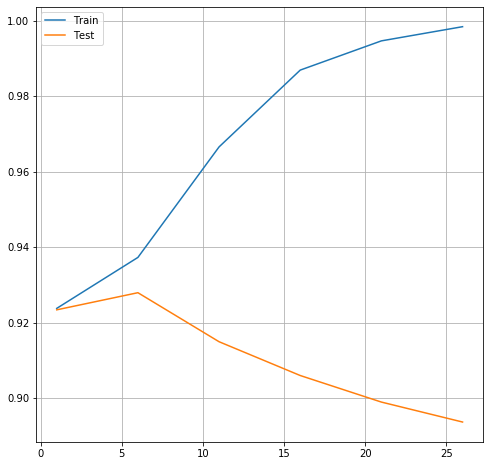

In [260]:
# plot to check optimal maximum depth
plt.figure(figsize=(8,8))
plt.plot(max_depth.param_max_depth, max_depth.mean_train_score)
plt.plot(max_depth.param_max_depth, max_depth.mean_test_score)
plt.legend(['Train','Test'])
plt.grid(True)
plt.show()

**The model perfroms the best at max_depth = 6 and after that the increase in depth doesn't really add anything to the model, wherein the accuracy on the test dataset just keeps dropping.**

In [261]:
# Min_samples_leaf
folds = 5

params = {"min_samples_leaf": range(1,200,20)}

tree = DecisionTreeClassifier(random_state=100)

model_samp = GridSearchCV(estimator=tree, cv=folds, param_grid=params, return_train_score=True, scoring='accuracy').fit(train_pca, y_train)

model_samp

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(1, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tru

In [262]:
min_samp = pd.DataFrame(model_samp.cv_results_)
min_samp

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.556786,0.153620,0.002398,0.003004,1,{'min_samples_leaf': 1},0.888172,0.887755,0.885673,0.891898,0.892314,0.889162,0.002552,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,1.638735,0.066902,0.005730,0.004971,21,{'min_samples_leaf': 21},0.924823,0.924615,0.919617,0.925432,0.922933,0.923484,0.002104,9,0.942778,0.944184,0.943820,0.943927,0.943823,0.943706,0.000483
2,1.432123,0.062242,0.001408,0.001756,41,{'min_samples_leaf': 41},0.927738,0.930446,0.928155,0.930223,0.925640,0.928441,0.001767,1,0.937467,0.937155,0.936582,0.937679,0.936534,0.937083,0.000461
3,1.363725,0.059966,0.001199,0.001469,61,{'min_samples_leaf': 61},0.926072,0.929613,0.926489,0.928973,0.926474,0.927524,0.001466,6,0.934604,0.935541,0.934812,0.933774,0.934555,0.934657,0.000565
4,1.288479,0.024704,0.001203,0.001473,81,{'min_samples_leaf': 81},0.929613,0.928571,0.925656,0.929390,0.923766,0.927399,0.002301,8,0.932781,0.933042,0.933614,0.932212,0.933566,0.933043,0.000521
5,1.300568,0.111686,0.004920,0.005475,101,{'min_samples_leaf': 101},0.928988,0.929404,0.925239,0.928765,0.924807,0.927441,0.001989,7,0.932625,0.932052,0.931948,0.931848,0.933462,0.932387,0.000601
6,1.230042,0.156058,0.001796,0.002223,121,{'min_samples_leaf': 121},0.929821,0.929196,0.925656,0.930848,0.923349,0.927774,0.002819,4,0.931636,0.932105,0.931532,0.931379,0.932056,0.931742,0.000289
7,1.171206,0.109917,0.003924,0.006051,141,{'min_samples_leaf': 141},0.931070,0.929196,0.926072,0.930639,0.923558,0.928107,0.002871,2,0.930334,0.931844,0.931584,0.931327,0.932525,0.931523,0.000716
8,1.110435,0.064980,0.000600,0.001200,161,{'min_samples_leaf': 161},0.931070,0.929613,0.925239,0.930848,0.923558,0.928066,0.003081,3,0.930334,0.930595,0.931115,0.931275,0.932525,0.931169,0.000759
9,1.066962,0.058102,0.003728,0.006069,181,{'min_samples_leaf': 181},0.931070,0.929613,0.925239,0.928557,0.923558,0.927607,0.002790,5,0.930334,0.930595,0.931115,0.930130,0.932525,0.930940,0.000858


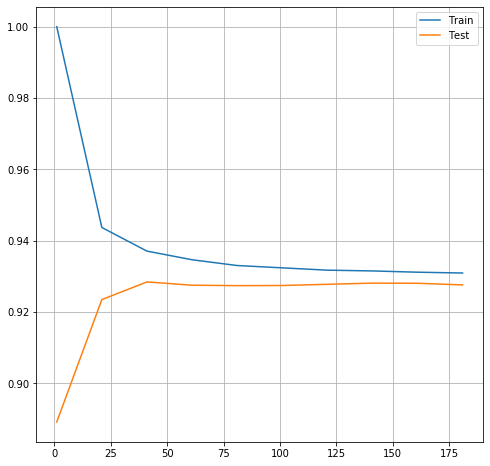

In [263]:
# plot to check optimal minimum samples leaf
plt.figure(figsize=(8,8))
plt.plot(min_samp.param_min_samples_leaf, min_samp.mean_train_score)
plt.plot(min_samp.param_min_samples_leaf, min_samp.mean_test_score)
plt.legend(['Train','Test'])
plt.grid(True)
plt.show()

**As seen from the above plot, accuracy of the model increases as min_samples_leaf increases. A steep increase from 0 to 25 and it kinds of flattens rest of the way. 
So we are choosing the Optimal minimum number of samples leaf, min_samples_leaf=100**.

In [264]:
# Min_samples_split
folds = 5

params = {"min_samples_split": range(2,700,50)}

tree = DecisionTreeClassifier(random_state=100)

model_split = GridSearchCV(estimator=tree, cv=folds, param_grid=params, return_train_score=True, scoring='accuracy').fit(train_pca, y_train)

model_split

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(2, 700, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Tr

In [265]:
model_split = pd.DataFrame(model_split.cv_results_)
model_split.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.381579,0.102840,0.000000,0.000000,2,{'min_samples_split': 2},0.888172,0.887755,0.885673,0.891898,0.892314,0.889162,0.002552,14,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,2.336437,0.091203,0.003125,0.006251,52,{'min_samples_split': 52},0.911912,0.912536,0.907747,0.913560,0.916476,0.912446,0.002823,13,0.954962,0.953140,0.953973,0.953350,0.952674,0.953620,0.000791
2,2.304418,0.098915,0.001400,0.001744,102,{'min_samples_split': 102},0.916077,0.917951,0.918367,0.921266,0.917101,0.918152,0.001743,12,0.945434,0.947204,0.945538,0.942833,0.945124,0.945227,0.001399
3,2.356948,0.102111,0.003122,0.006245,152,{'min_samples_split': 152},0.921283,0.923157,0.919825,0.922516,0.916476,0.920651,0.002378,11,0.940539,0.941841,0.942987,0.938981,0.939762,0.940822,0.001437
4,2.260988,0.105064,0.003124,0.006249,202,{'min_samples_split': 202},0.923574,0.924406,0.921491,0.927099,0.918350,0.922984,0.002932,10,0.938353,0.939654,0.940852,0.935857,0.938564,0.938656,0.001659


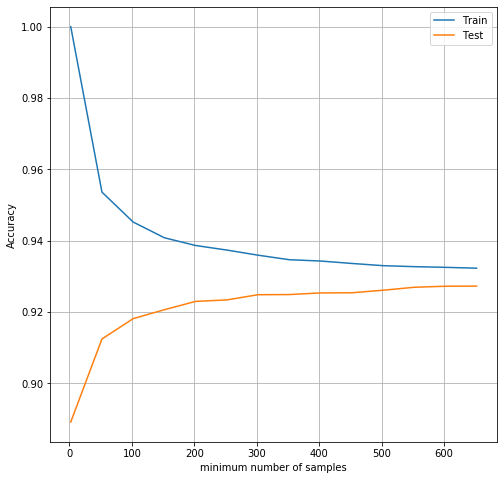

In [266]:
# To find optimal number of min_samples_split
plt.figure(figsize=(8,8))
plt.plot(model_split.param_min_samples_split, model_split.mean_train_score)
plt.plot(model_split.param_min_samples_split, model_split.mean_test_score)
plt.legend(['Train','Test'])
plt.ylabel("Accuracy")
plt.xlabel("minimum number of samples")
plt.grid(True)
plt.show()

**The test accuracy of the model increases steadily as the min_samples_split increases. So, min_samples_split = 500**.

In [309]:
#now building the Decision Tree using the above optimum Hyper-parameters. 
dt = DecisionTreeClassifier(min_samples_split=500, max_depth=5, min_samples_leaf=100, random_state=100,
                           criterion='entropy', class_weight='balanced')


model3 = dt.fit(train_pca, y_train)

print("Accuracy Score on Decision Trees",model3.score(test_pca, y_test))

Accuracy Score on Decision Trees 0.7939363651507579


**The accuracy of the Decision Tree model on the train dataset is clost to 80%, which is pretty good for a model.**

In [268]:
# Classification Report of the Decision Trees
y_test_dt = model3.predict(test_pca)

print(classification_report(y_test, y_test_dt))

              precision    recall  f1-score   support

           0       0.97      0.79      0.88      5470
           1       0.27      0.79      0.41       533

    accuracy                           0.79      6003
   macro avg       0.62      0.79      0.64      6003
weighted avg       0.91      0.79      0.83      6003



- The accuracy of the Decision Tree model on the TEST dataset is 79%, which is pretty good for a model.
- The RECALL score for both Churn and  Non-Churns is 79%


**From the above metrics, we can conclude that the above is a decent one.**


### Comparing the LR Model with PCA against Decision Tree model

- Accuracy & Recall:
 - LR Model with PCA: 85%
 - Decision Tree: 79%

**From the above metrics, we can conclude that LR Model with PCA that has 55 Principal Components performs better than the Decison Tree model.**
 

### Model to Determine the Important Variables 

To determine the important driver features for Churn, we are using Logistic Regression with VIF. 

#### Logistic Regression

In [269]:
# Creating a new train dataset of standardized train set 
X_train_n = pd.DataFrame(new_data)
X_train_n.columns = X_train.columns

print(X_train_n.shape)

# Creating a new test set from standardized test set
X_test_n = pd.DataFrame(new_test)
X_test_n.columns = X_test.columns 

print(X_test.shape)

(24008, 112)
(6003, 112)


In [270]:
# Let's look at new train set 
X_train_n.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,arpu_pm,diff_ic_mou,diff_oc_mou,Av_tot_amt_data,Av_tot_rech,diff_roam_ic_mou,diff_roam_og_mou,Av_rech_number_pm,Days_since_last_recharge
0,3.072937,2.385922,2.125960,-0.616516,-0.392744,-0.231711,-0.496251,-0.439571,-0.284929,-0.490002,-0.198911,0.137497,-0.431798,-0.437504,-0.432128,0.447942,-0.049585,0.499634,-0.601749,-0.388173,-0.081933,3.758873,2.929222,2.577267,-0.372125,-0.298265,-0.278114,-0.249131,-0.248758,-0.246272,2.179977,1.672869,1.479501,-0.165538,-0.167176,-0.161201,1.173270,0.982023,0.088249,0.083748,0.099851,0.179698,-0.498363,-0.440064,-0.315864,-0.502749,0.658670,-0.015915,-0.443382,-0.457594,-0.457781,-0.600769,0.195396,-0.201359,-0.047900,2.492767,1.677988,-0.322068,0.671079,0.249933,-0.285107,-0.284588,-0.289804,-0.288237,1.288637,0.728435,-0.375008,-0.206733,-0.140121,-0.257538,-0.272584,-0.264090,0.068792,0.055165,0.158012,-0.388446,-0.402357,-0.752535,-0.639560,-0.810077,-0.557031,-0.340109,-0.334131,-0.318779,-0.382498,-0.394267,-0.38236,-0.339759,-0.342807,-0.323272,-0.335807,-0.350899,-0.371551,-0.329159,-0.335242,-0.325088,-0.234284,-0.230087,-0.214739,-0.587327,-0.376484,-0.372900,-0.358401,1.083298,-0.107379,0.317997,-0.417438,1.026363,-0.033697,-0.073608,2.605712,-0.788865
1,-0.529329,-0.556356,-0.434873,-0.313573,-0.250835,-0.167040,-0.125905,-0.146821,0.073930,0.219386,0.494765,0.379626,2.971268,1.559333,3.684956,-0.353989,-0.358829,-0.354880,0.193041,0.298684,0.427735,-0.489717,-0.519656,-0.476405,-0.529135,-0.544525,-0.507867,-0.249131,-0.176187,-0.246272,-0.673634,-0.703451,-0.636890,-0.165538,-0.167176,-0.161201,-0.459844,-0.491155,-0.505941,0.083748,0.099851,0.179698,0.714360,0.285057,0.696251,0.672281,0.414425,0.666222,0.892919,0.726043,1.179426,0.803749,0.445280,0.809989,-0.120062,-0.401895,-0.247380,-0.482297,-0.474743,-0.480448,-0.285107,-0.284588,-0.087516,-0.422223,-0.513486,-0.444684,-0.375008,-0.206733,-0.140121,-0.257538,-0.272584,-0.264090,0.080933,0.055165,0.178249,2.166481,0.488472,0.606761,1.354636,1.320802,1.424604,0.323130,0.756975,0.895220,1.003041,0.694514,0.28793,-0.339759,-0.342807,-0.323272,1.132449,0.305359,0.949960,-0.329159,-0.335242,-0.325088,4.518304,2.077321,4.528095,1.646815,1.164573,2.486352,1.619320,2.007475,-0.289487,-0.217734,2.515205,1.988333,-0.033697,-0.073608,-0.644240,-0.003785
2,-0.488049,-0.482904,-0.449792,-0.479559,-0.546812,-0.310573,0.031867,0.002780,0.030926,0.144230,-0.018055,0.305704,-0.358984,0.171689,0.582403,-0.353989,-0.358829,-0.354880,0.072975,-0.023580,0.220186,-0.513629,-0.500225,

In [271]:
# RFE For Feature Selection
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train_n, y_train)

list(zip(X_train_n.columns, rfe.support_, rfe.ranking_))

[('onnet_mou_6', False, 7),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 59),
 ('offnet_mou_6', False, 28),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 6),
 ('loc_og_t2t_mou_6', False, 68),
 ('loc_og_t2t_mou_7', False, 21),
 ('loc_og_t2t_mou_8', False, 5),
 ('loc_og_t2m_mou_6', False, 27),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', False, 53),
 ('loc_og_t2f_mou_6', False, 52),
 ('loc_og_t2f_mou_7', False, 39),
 ('loc_og_t2f_mou_8', False, 40),
 ('loc_og_t2c_mou_6', False, 86),
 ('loc_og_t2c_mou_7', False, 54),
 ('loc_og_t2c_mou_8', False, 62),
 ('loc_og_mou_6', False, 91),
 ('loc_og_mou_7', False, 50),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 77),
 ('std_og_t2t_mou_7', False, 2),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 9),
 ('std_og_t2m_mou_7', True, 1),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 65),
 ('std_og_t2f_mou_7', False, 83),
 ('std_og_t2f_mou_8', False, 36),
 ('std_og_mou_6', False, 19),
 ('std_o

In [272]:
cols = X_train_n.columns[rfe.support_]

# Dataframe from RFE columns 
X = X_train_n[cols]

X.head()

,onnet_mou_7,offnet_mou_7,loc_og_t2m_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_7,std_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_7,spl_ic_mou_8,ic_others_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,monthly_3g_8,arpu_pm,Days_since_last_recharge
0,2.385922,-0.392744,-0.198911,-0.081933,2.577267,-0.298265,-0.278114,-0.315864,-0.015915,-0.457781,0.195396,-0.140121,0.158012,-0.557031,-0.318779,-0.38236,-0.323272,-0.325088,1.083298,-0.788865
1,-0.556356,-0.250835,0.494765,0.427735,-0.476405,-0.544525,-0.507867,0.696251,0.666222,1.179426,0.445280,-0.140121,0.178249,1.424604,0.895220,0.28793,-0.323272,-0.325088,2.007475,-0.003785
2,-0.482904,-0.546812,-0.018055,0.220186,-0.475750,-0.544101,-0.505951,0.532736,0.183916,-0.356142,0.182569,-0.140121,0.158012,0.559891,0.833086,-0.38236,2.549088,-0.325088,-0.698726,0.585025
3,-0.443658,0.662880,2.515811,1.812515,-0.476405,-0.544525,-0.513974,0.634713,1.191510,-0.466365,0.312095,-0.140121,0.569597,0.469816,-0.318779,-0.38236,-0.323272,-0.325088,0.699038,0.192485
4,-0.705517,-0.262737,0.601153,-0.537110,-0.476405,-0.544525,-0.494336,-0.494272,-0.783172,-0.390479,-0.799595,-0.140121,0.158012,-0.674128,2.238280,-0.38236,-0.323272,-0.325088,-0.139037,-0.003785


In [273]:
X.shape

(24008, 20)

In [274]:
y_train = list(y_train)

In [275]:
# Model 1 

X1 = sm.add_constant(X)
model1 = sm.GLM(y_train, X1, family=sm.families.Binomial())
res= model1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23987
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4341.6
Date:                Sun, 15 Dec 2019   Deviance:                       8683.2
Time:                        11:26:43   Pearson chi2:                 2.53e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.9213      0.065    -60.711      0.000      -4.048      -3.795
onnet_mou_7                  0.1808      0.038      4.756      0.000       0.106       0.255
offnet_mou_7                 0.6422      0.122      5.265      0.000       0.403       0.881
loc_og_t2m_mou_7            -0.4185      0.082     -5.106      0.000      -0.579      -0.258
loc_og_mou_8                -0.7532      0.103     -7.283      0.000      -0.956      -0.551
std_og_t2t_mou_8            -0.4484      0.049     -9.184      0.000      -0.544      -0.353
std_og_t2m_mou_7            -0.3002      0.111     -2.712      0.007      -0.517      -0.083
std_og_t2m_mou_8            -0.5474      0.053    -10.388      0.000      -0.651      -0.444
loc_ic_t2t_mou_8            -0.6714      0.093     -7.258      0.000      -0.853      -0.490
loc_ic_t2m_mou_8            -1.1005      0.107    -10.242      0.000      -1.311      -0.890
loc_ic_t2f_mou_8            -0.4045      0.080     -5.052      0.000      -0.561      -0.248
loc_ic_mou_7                 0.5438      0.068      8.028      0.000       0.411       0.677
spl_ic_mou_8                -0.5454      0.081     -6.697      0.000      -0.705      -0.386
ic_others_8                 -0.4820      0.044    -11.067      0.000      -0.567      -0.397
last_day_rch_amt_8          -0.6160      0.049    -12.675      0.000      -0.711      -0.521
vol_2g_mb_8                 -0.2589      0.056     -4.640      0.000      -0.368      -0.150
vol_3g_mb_8                 -0.3637      0.076     -4.766      0.000      -0.513      -0.214
monthly_2g_8                -0.3310      0.069     -4.811      0.000      -0.466      -0.196
monthly_3g_8                -0.3431      0.085     -4.053      0.000      -0.509      -0.177
arpu_pm                      0.3540      0.043      8.151      0.000       0.269       0.439
Days_since_last_recharge     0.3452      0.024     14.381      0.000       0.298       0.392
============================================================================================
"""

In [276]:
#Vif
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,offnet_mou_7,22.78
5,std_og_t2m_mou_7,19.81
2,loc_og_t2m_mou_7,7.96
10,loc_ic_mou_7,3.99
3,loc_og_mou_8,2.97
8,loc_ic_t2m_mou_8,2.88
6,std_og_t2m_mou_8,2.83
0,onnet_mou_7,2.52
15,vol_3g_mb_8,2.50
17,monthly_3g_8,2.42


In [277]:
# Model 2 #drop feature with highest VIF. 
X2 = X.drop('offnet_mou_7',axis=1)
X2_sm = sm.add_constant(X2)
model2 = sm.GLM(y_train, X2_sm, family=sm.families.Binomial())
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23988
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4354.8
Date:                Sun, 15 Dec 2019   Deviance:                       8709.5
Time:                        11:26:45   Pearson chi2:                 2.65e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.9251      0.065    -60.603      0.000      -4.052      -3.798
onnet_mou_7                  0.1562      0.038      4.142      0.000       0.082       0.230
loc_og_t2m_mou_7            -0.1219      0.060     -2.031      0.042      -0.239      -0.004
loc_og_mou_8                -0.7706      0.105     -7.372      0.000      -0.976      -0.566
std_og_t2t_mou_8            -0.4774      0.049     -9.816      0.000      -0.573      -0.382
std_og_t2m_mou_7             0.2529      0.036      7.052      0.000       0.183       0.323
std_og_t2m_mou_8            -0.5668      0.052    -10.803      0.000      -0.670      -0.464
loc_ic_t2t_mou_8            -0.6771      0.094     -7.236      0.000      -0.861      -0.494
loc_ic_t2m_mou_8            -1.1245      0.108    -10.383      0.000      -1.337      -0.912
loc_ic_t2f_mou_8            -0.4009      0.081     -4.970      0.000      -0.559      -0.243
loc_ic_mou_7                 0.5310      0.068      7.840      0.000       0.398       0.664
spl_ic_mou_8                -0.5458      0.081     -6.715      0.000      -0.705      -0.386
ic_others_8                 -0.4840      0.044    -11.127      0.000      -0.569      -0.399
last_day_rch_amt_8          -0.5907      0.048    -12.342      0.000      -0.685      -0.497
vol_2g_mb_8                 -0.2705      0.056     -4.850      0.000      -0.380      -0.161
vol_3g_mb_8                 -0.3921      0.076     -5.153      0.000      -0.541      -0.243
monthly_2g_8                -0.3278      0.068     -4.800      0.000      -0.462      -0.194
monthly_3g_8                -0.3554      0.085     -4.204      0.000      -0.521      -0.190
arpu_pm                      0.4555      0.038     11.951      0.000       0.381       0.530
Days_since_last_recharge     0.3429      0.024     14.292      0.000       0.296       0.390
============================================================================================
"""

In [278]:
#Vif
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
9,loc_ic_mou_7,3.99
2,loc_og_mou_8,2.97
7,loc_ic_t2m_mou_8,2.88
4,std_og_t2m_mou_7,2.87
5,std_og_t2m_mou_8,2.83
1,loc_og_t2m_mou_7,2.64
0,onnet_mou_7,2.50
14,vol_3g_mb_8,2.48
16,monthly_3g_8,2.41
3,std_og_t2t_mou_8,2.38


In [279]:
# Model3 #drop feature with highest VIF. 
X3 = X2.drop('loc_ic_mou_7', axis=1)
X3_sm =  sm.add_constant(X3)
model3 = sm.GLM(y_train, X3_sm, family=sm.families.Binomial())
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23989
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4384.8
Date:                Sun, 15 Dec 2019   Deviance:                       8769.6
Time:                        11:26:46   Pearson chi2:                 2.64e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.8906      0.064    -60.787      0.000      -4.016      -3.765
onnet_mou_7                  0.1863      0.038      4.953      0.000       0.113       0.260
loc_og_t2m_mou_7             0.0766      0.053      1.444      0.149      -0.027       0.181
loc_og_mou_8                -0.9830      0.106     -9.257      0.000      -1.191      -0.775
std_og_t2t_mou_8            -0.5218      0.049    -10.705      0.000      -0.617      -0.426
std_og_t2m_mou_7             0.2679      0.036      7.495      0.000       0.198       0.338
std_og_t2m_mou_8            -0.5961      0.053    -11.344      0.000      -0.699      -0.493
loc_ic_t2t_mou_8            -0.4012      0.086     -4.642      0.000      -0.571      -0.232
loc_ic_t2m_mou_8            -0.8073      0.100     -8.077      0.000      -1.003      -0.611
loc_ic_t2f_mou_8            -0.3175      0.080     -3.963      0.000      -0.475      -0.161
spl_ic_mou_8                -0.5555      0.081     -6.821      0.000      -0.715      -0.396
ic_others_8                 -0.4513      0.043    -10.434      0.000      -0.536      -0.367
last_day_rch_amt_8          -0.6001      0.048    -12.526      0.000      -0.694      -0.506
vol_2g_mb_8                 -0.2707      0.056     -4.871      0.000      -0.380      -0.162
vol_3g_mb_8                 -0.3942      0.076     -5.192      0.000      -0.543      -0.245
monthly_2g_8                -0.3252      0.068     -4.763      0.000      -0.459      -0.191
monthly_3g_8                -0.3521      0.084     -4.196      0.000      -0.517      -0.188
arpu_pm                      0.4638      0.038     12.229      0.000       0.389       0.538
Days_since_last_recharge     0.3476      0.024     14.557      0.000       0.301       0.394
============================================================================================
"""

In [280]:
X3 = X2.drop('loc_og_t2m_mou_7', axis=1)
X3_sm =  sm.add_constant(X3)
model3 = sm.GLM(y_train, X3_sm, family=sm.families.Binomial())
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23989
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4356.9
Date:                Sun, 15 Dec 2019   Deviance:                       8713.7
Time:                        11:26:46   Pearson chi2:                 2.67e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.9275      0.065    -60.510      0.000      -4.055      -3.800
onnet_mou_7                  0.1610      0.038      4.268      0.000       0.087       0.235
loc_og_mou_8                -0.8723      0.095     -9.201      0.000      -1.058      -0.686
std_og_t2t_mou_8            -0.4738      0.049     -9.744      0.000      -0.569      -0.379
std_og_t2m_mou_7             0.2522      0.036      7.037      0.000       0.182       0.322
std_og_t2m_mou_8            -0.5581      0.052    -10.690      0.000      -0.660      -0.456
loc_ic_t2t_mou_8            -0.6252      0.090     -6.976      0.000      -0.801      -0.450
loc_ic_t2m_mou_8            -1.1183      0.109    -10.239      0.000      -1.332      -0.904
loc_ic_t2f_mou_8            -0.3891      0.081     -4.820      0.000      -0.547      -0.231
loc_ic_mou_7                 0.4709      0.061      7.705      0.000       0.351       0.591
spl_ic_mou_8                -0.5459      0.081     -6.717      0.000      -0.705      -0.387
ic_others_8                 -0.4845      0.043    -11.140      0.000      -0.570      -0.399
last_day_rch_amt_8          -0.5873      0.048    -12.277      0.000      -0.681      -0.494
vol_2g_mb_8                 -0.2680      0.056     -4.811      0.000      -0.377      -0.159
vol_3g_mb_8                 -0.3872      0.076     -5.093      0.000      -0.536      -0.238
monthly_2g_8                -0.3263      0.068     -4.779      0.000      -0.460      -0.192
monthly_3g_8                -0.3534      0.085     -4.180      0.000      -0.519      -0.188
arpu_pm                      0.4455      0.038     11.753      0.000       0.371       0.520
Days_since_last_recharge     0.3406      0.024     14.225      0.000       0.294       0.388
============================================================================================
"""

In [281]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
8,loc_ic_mou_7,3.61
3,std_og_t2m_mou_7,2.87
6,loc_ic_t2m_mou_8,2.87
4,std_og_t2m_mou_8,2.80
13,vol_3g_mb_8,2.47
15,monthly_3g_8,2.41
2,std_og_t2t_mou_8,2.37
0,onnet_mou_7,2.36
1,loc_og_mou_8,1.95
16,arpu_pm,1.94


In [282]:
# Model4 #drop feature with highest VIF. 
X4 = X3.drop('loc_ic_mou_7', axis=1)
X4_sm =  sm.add_constant(X4)
model3 = sm.GLM(y_train, X4_sm, family=sm.families.Binomial())
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23990
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4385.8
Date:                Sun, 15 Dec 2019   Deviance:                       8771.6
Time:                        11:26:47   Pearson chi2:                 2.59e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.8837      0.064    -61.061      0.000      -4.008      -3.759
onnet_mou_7                  0.1857      0.038      4.944      0.000       0.112       0.259
loc_og_mou_8                -0.9196      0.095     -9.650      0.000      -1.106      -0.733
std_og_t2t_mou_8            -0.5288      0.049    -10.898      0.000      -0.624      -0.434
std_og_t2m_mou_7             0.2701      0.036      7.559      0.000       0.200       0.340
std_og_t2m_mou_8            -0.6055      0.052    -11.594      0.000      -0.708      -0.503
loc_ic_t2t_mou_8            -0.4158      0.086     -4.822      0.000      -0.585      -0.247
loc_ic_t2m_mou_8            -0.7860      0.098     -7.999      0.000      -0.979      -0.593
loc_ic_t2f_mou_8            -0.3186      0.080     -3.983      0.000      -0.475      -0.162
spl_ic_mou_8                -0.5561      0.081     -6.826      0.000      -0.716      -0.396
ic_others_8                 -0.4482      0.043    -10.374      0.000      -0.533      -0.363
last_day_rch_amt_8          -0.6036      0.048    -12.614      0.000      -0.697      -0.510
vol_2g_mb_8                 -0.2727      0.056     -4.906      0.000      -0.382      -0.164
vol_3g_mb_8                 -0.3979      0.076     -5.243      0.000      -0.547      -0.249
monthly_2g_8                -0.3260      0.068     -4.775      0.000      -0.460      -0.192
monthly_3g_8                -0.3538      0.084     -4.219      0.000      -0.518      -0.189
arpu_pm                      0.4719      0.037     12.603      0.000       0.398       0.545
Days_since_last_recharge     0.3498      0.024     14.672      0.000       0.303       0.397
============================================================================================
"""

In [283]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,std_og_t2m_mou_7,2.86
4,std_og_t2m_mou_8,2.78
12,vol_3g_mb_8,2.47
14,monthly_3g_8,2.41
0,onnet_mou_7,2.35
2,std_og_t2t_mou_8,2.33
1,loc_og_mou_8,1.94
15,arpu_pm,1.92
6,loc_ic_t2m_mou_8,1.61
13,monthly_2g_8,1.41


In [284]:
# Model5 #drop feature with highest VIF. 
X5 = X4.drop('std_og_t2m_mou_7', axis=1)
X5_sm =  sm.add_constant(X5)
model3 = sm.GLM(y_train, X5_sm, family=sm.families.Binomial())
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23991
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4414.3
Date:                Sun, 15 Dec 2019   Deviance:                       8828.7
Time:                        11:26:48   Pearson chi2:                 3.61e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.9183      0.064    -60.805      0.000      -4.045      -3.792
onnet_mou_7                  0.1768      0.037      4.717      0.000       0.103       0.250
loc_og_mou_8                -0.9919      0.097    -10.265      0.000      -1.181      -0.803
std_og_t2t_mou_8            -0.5625      0.049    -11.559      0.000      -0.658      -0.467
std_og_t2m_mou_8            -0.3761      0.040     -9.462      0.000      -0.454      -0.298
loc_ic_t2t_mou_8            -0.4396      0.087     -5.026      0.000      -0.611      -0.268
loc_ic_t2m_mou_8            -0.8268      0.099     -8.334      0.000      -1.021      -0.632
loc_ic_t2f_mou_8            -0.3378      0.081     -4.166      0.000      -0.497      -0.179
spl_ic_mou_8                -0.5505      0.081     -6.760      0.000      -0.710      -0.391
ic_others_8                 -0.4481      0.043    -10.366      0.000      -0.533      -0.363
last_day_rch_amt_8          -0.6444      0.048    -13.503      0.000      -0.738      -0.551
vol_2g_mb_8                 -0.2920      0.056     -5.226      0.000      -0.401      -0.182
vol_3g_mb_8                 -0.4236      0.076     -5.578      0.000      -0.572      -0.275
monthly_2g_8                -0.3284      0.068     -4.810      0.000      -0.462      -0.195
monthly_3g_8                -0.3636      0.084     -4.342      0.000      -0.528      -0.199
arpu_pm                      0.5326      0.036     14.774      0.000       0.462       0.603
Days_since_last_recharge     0.3542      0.024     14.890      0.000       0.308       0.401
============================================================================================
"""

In [285]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
11,vol_3g_mb_8,2.46
13,monthly_3g_8,2.41
0,onnet_mou_7,2.34
2,std_og_t2t_mou_8,2.31
1,loc_og_mou_8,1.90
14,arpu_pm,1.84
5,loc_ic_t2m_mou_8,1.60
12,monthly_2g_8,1.41
7,spl_ic_mou_8,1.38
8,ic_others_8,1.38


In [286]:
# Model5 #drop feature with highest VIF. 
X6 = X5.drop('vol_3g_mb_8', axis=1)
X6_sm =  sm.add_constant(X6)
model6 = sm.GLM(y_train, X6_sm, family=sm.families.Binomial())
res6 = model6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24008
Model:                            GLM   Df Residuals:                    23992
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4434.4
Date:                Sun, 15 Dec 2019   Deviance:                       8868.7
Time:                        11:26:49   Pearson chi2:                 2.69e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -3.9228      0.065    -60.618      0.000      -4.050      -3.796
onnet_mou_7                  0.1922      0.037      5.146      0.000       0.119       0.265
loc_og_mou_8                -0.9711      0.096    -10.112      0.000      -1.159      -0.783
std_og_t2t_mou_8            -0.5644      0.049    -11.596      0.000      -0.660      -0.469
std_og_t2m_mou_8            -0.3619      0.040     -9.146      0.000      -0.439      -0.284
loc_ic_t2t_mou_8            -0.4447      0.088     -5.076      0.000      -0.616      -0.273
loc_ic_t2m_mou_8            -0.8404      0.099     -8.457      0.000      -1.035      -0.646
loc_ic_t2f_mou_8            -0.3387      0.081     -4.188      0.000      -0.497      -0.180
spl_ic_mou_8                -0.5533      0.081     -6.792      0.000      -0.713      -0.394
ic_others_8                 -0.4448      0.043    -10.310      0.000      -0.529      -0.360
last_day_rch_amt_8          -0.6427      0.047    -13.640      0.000      -0.735      -0.550
vol_2g_mb_8                 -0.2738      0.056     -4.897      0.000      -0.383      -0.164
monthly_2g_8                -0.4482      0.064     -6.949      0.000      -0.575      -0.322
monthly_3g_8                -0.6884      0.067    -10.224      0.000      -0.820      -0.556
arpu_pm                      0.5067      0.036     14.176      0.000       0.437       0.577
Days_since_last_recharge     0.3579      0.024     15.058      0.000       0.311       0.404
============================================================================================
"""

In [287]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,onnet_mou_7,2.34
2,std_og_t2t_mou_8,2.31
1,loc_og_mou_8,1.89
13,arpu_pm,1.79
5,loc_ic_t2m_mou_8,1.60
7,spl_ic_mou_8,1.38
8,ic_others_8,1.38
4,loc_ic_t2t_mou_8,1.28
3,std_og_t2m_mou_8,1.26
9,last_day_rch_amt_8,1.26


In [288]:
# Prediction on Train set 
y_train_pred = res6.predict(X6_sm).values.reshape(-1)
y_train_pred

array([0.03415929, 0.00643603, 0.00335918, ..., 0.00660712, 0.1195027 ,
       0.00018468])

In [289]:
# Predicted values dataset for train data on default probability
y_train_final = pd.DataFrame()
y_train_final['Churn'] = y_train
y_train_final['Churn_Prob'] = y_train_pred
y_train_final['Predicted'] = y_train_final['Churn_Prob'].map(lambda x: 1 if x>0.5 else 0)

y_train_final.head()

,Churn,Churn_Prob,Predicted
0,0,0.034159,0
1,0,0.006436,0
2,0,0.003359,0
3,0,0.002381,0
4,0,0.124096,0


In [290]:
print(metrics.accuracy_score(y_train_final.Churn, y_train_final.Predicted))

0.9321476174608464


**Accuracy of the model on train set is very good.**

In [291]:
# Let' see the confusion matrix
confusion = confusion_matrix(y_train_final.Churn, y_train_final.Predicted)
confusion

array([[21704,   244],
       [ 1385,   675]], dtype=int64)

In [292]:
# Checking other metrics
TP = confusion[1,1]
TN = confusion[0,0]
FN = confusion[1,0]
FP = confusion[0,1]

# Sensitivity 
sensi = TP/float(TP+FN)
print("Sensitivity:",sensi)

# Specificity
speci = TN/float(TN+FP)
print("Specificity:", speci)

# False Positive rate
fpr =FP/float(TP+FP)
print("False Positive Rate:", fpr)

#Positive Predicted Values
ppv = TP/float(TP+FP)
print("Positive Predictive Values:", ppv)

# Negetive Predictive Values
npv = TN/float(TN+FN)
print("Negetive Predictive Values:", npv)

Sensitivity: 0.3276699029126214
Specificity: 0.9888828139238199
False Positive Rate: 0.26550598476605003
Positive Predictive Values: 0.73449401523395
Negetive Predictive Values: 0.9400147256269219


**Since, the market is very competitive and the customer loyalty is sparse, we need correctly predict actual churners as churners. While doing so, it's okay if we predict some non-churners as churners. Hence, Sensitivity/Recall metrics is key for us. As seen above, the cut-off of 0.5 doesn't yield good Sensitivity, so, we need to calculate the optimum cut-off probability to decide churn/non-churn.**

In [293]:
# ROC curve  
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return None

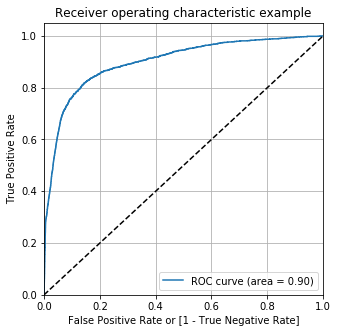

In [294]:
draw_roc(y_train_final.Churn, y_train_final.Churn_Prob)

**AUC is 0.9 is a very good value for the model. All we have to do now is to find the optimum cut-off probability  decide churn/non-churn.**

In [295]:
# Predicttion at different probability
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_final[i]= y_train_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_final.head()

,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.034159,0,1,0,0,0,0,0,0,0,0,0
1,0,0.006436,0,1,0,0,0,0,0,0,0,0,0
2,0,0.003359,0,1,0,0,0,0,0,0,0,0,0
3,0,0.002381,0,1,0,0,0,0,0,0,0,0,0
4,0,0.124096,0,1,1,0,0,0,0,0,0,0,0


In [296]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_final.Churn, y_train_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.085805,1.000000,0.000000
0.1,0.1,0.840553,0.828641,0.841671
0.2,0.2,0.915820,0.686893,0.937306
0.3,0.3,0.927816,0.481553,0.969701
0.4,0.4,0.930606,0.375728,0.982686
0.5,0.5,0.932148,0.327670,0.988883
0.6,0.6,0.932814,0.299029,0.992300
0.7,0.7,0.933356,0.283981,0.994305
0.8,0.8,0.926400,0.180583,0.996401
0.9,0.9,0.917777,0.050485,0.999180


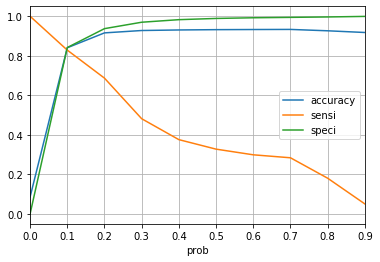

In [297]:
# Plot to check what is the optimum value
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.grid(True)
plt.show()

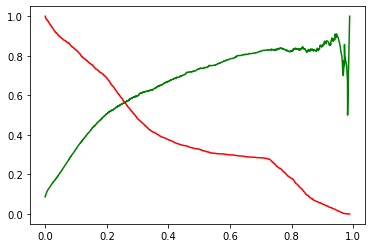

In [298]:
# Precision and Recall curve to again check optimal cutoff 
p, r, thresholds = metrics.precision_recall_curve(y_train_final.Churn, y_train_final.Churn_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

**As seen from the above two plots, we will choose 0.1 as our optimum cut-off probability to decide churn/non-churn as 
the market is very competitive and the customer loyalty is sparse, we need correctly predict actual churners as churners. While doing so, it's okay if we predict some non-churners as churners. This will make sure out model will have high Sensitivity/Recall metrics, which is key for us.**

In [299]:
# Final predicted values dataset on the cutoff probability of 0.1
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Churn'] = y_train
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final["Predicted"] = y_train_pred_final["Churn_Prob"].apply(lambda x: 1 if x>0.1 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted
0,0,0.034159,0
1,0,0.006436,0
2,0,0.003359,0
3,0,0.002381,0
4,0,0.124096,1


In [300]:
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.8405531489503499


In [301]:
print(confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted))

[[18473  3475]
 [  353  1707]]


In [302]:
print("Precision:", metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))
print("Sensitivity/Recall:", metrics.recall_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

Precision: 0.32940949440370515
Sensitivity/Recall: 0.8286407766990291


`Observations from above metrics for TRAIN set:`
<br>The model is predicting: 
- with an Accuracy of 84%, which is very good for a model. 
- 1707 actual churners as churners. 
- 3475 non-churners as churners, which is okay given the situation of the market and the industry.  
- 18473 non-churners as non-churners. 
- Only 353 churners as non-churners (this is definitely a good model prediction though not ideal). 
- Sensitivity/Recall is 82%, which is very good for a model, especially this being our key metrics. 

**From the above metrics, we can conclude that the model has performed well on the train dataset.**
 

#### Predictions on Test Set

In [303]:
# Forming test set out of columns of final training model
X_test_final = X_test_n[X6.columns]

X_test_final.head()

,onnet_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,spl_ic_mou_8,ic_others_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,monthly_3g_8,arpu_pm,Days_since_last_recharge
0,-0.626810,-0.822752,-0.472847,-0.503706,-0.413600,-0.007476,-0.108913,-0.140121,0.158012,-0.827254,-0.318779,-0.323272,-0.325088,-0.565170,-0.788865
1,2.483897,-0.706064,0.147599,-0.350498,-0.636998,-0.848770,-0.466365,-0.140121,0.158012,1.424604,-0.318779,-0.323272,-0.325088,-0.198199,0.192485
2,-0.704851,-0.705935,-0.476405,-0.513974,-0.542778,0.145491,-0.345154,-0.140121,0.158012,1.442619,-0.297191,-0.323272,3.620675,-0.325646,-0.003785
3,-0.650833,-0.125783,-0.476405,-0.513974,-0.455487,0.622340,-0.259997,-0.140121,0.158012,-0.557031,-0.318779,-0.323272,-0.325088,-0.117428,-0.788865
4,2.812572,4.046710,-0.476405,-0.510082,-0.469863,-0.071893,-0.284720,-0.140121,0.166490,-0.620083,-0.318779,-0.323272,-0.325088,-0.842012,-0.592595


In [304]:
# Prediction on test set
X_test_final_sm = sm.add_constant(X_test_final)

y_test_pred = res6.predict(X_test_final_sm)

y_test_pred = list(y_test_pred)

In [305]:
y_test_pred_df = pd.DataFrame()
y_test_pred_df['Churn'] = y_test
y_test_pred_df['Churn_Prob'] = y_test_pred
y_test_pred_df['Test_Prediction'] = y_test_pred_df['Churn_Prob'].map(lambda x: 1 if x>0.1 else 0)

y_test_pred_df.head()

,Churn,Churn_Prob,Test_Prediction
29360,0,0.105096,1
49979,0,0.114513,1
90612,0,0.002389,0
87007,0,0.038276,0
91852,0,0.001883,0


In [306]:
# Accuracy on test set
print(metrics.accuracy_score(y_test_pred_df.Churn, y_test_pred_df.Test_Prediction))

0.853240046643345


In [307]:
# Confusion Matrix on Test Set
print(confusion_matrix(y_test_pred_df.Churn, y_test_pred_df.Test_Prediction))

[[4669  801]
 [  80  453]]


In [308]:
# Sensitivity or Recall score on the test set
print("Sensitivity/Recall score on Test Set", metrics.recall_score(y_test_pred_df.Churn, y_test_pred_df.Test_Prediction))

Sensitivity/Recall score on Test Set 0.849906191369606


`Observations from above metrics for the TEST set:`
<br>The model is predicting: 
- with an Accuracy of 85%, which is very good for a model and better than that on the train set. 
- 453 actual churners as churners. 
- 801 non-churners as churners, which is okay given the situation of the market and the industry.  
- 4669 non-churners as non-churners. 
- Only 80 churners as non-churners (this is definitely a good model prediction though not ideal). 
- Sensitivity/Recall is 84%, which is very good for a model and better than that on the train set, especially this being our key metrics. 

**From the above metrics, we can conclude that the model has performed well on the TEST dataset as well and this model can be our final model.**

### Important Predictors

Below are the important predictors of the Churn as per our model. The following variables are arranged in the increasing order of their VIFs since all of these variables have p-value close to zero, which means they are all statistically significant in the model.

- loc_ic_t2f_mou_8
- Days_since_last_recharge
- vol_2g_mb_8
- monthly_2g_8
- monthly_3g_8
- std_og_t2m_mou_8
- last_day_rch_amt_8
- loc_ic_t2t_mou_8
- spl_ic_mou_8
- ic_others_8
- loc_ic_t2m_mou_8
- arpu_pm
- loc_og_mou_8
- std_og_t2t_mou_8
- onnet_mou_7



### Strategies to Manage High Value Customer Churn

- Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. So, the company should make the customer retention one of their top priorities if not the top priority. 
- As seen from the above list of important predictor variables, bulk of them are from month-8, which is the 'action month'. So, the company has to monitor the customers in this phase and has to make realtime flexible strategy to retain these customers. One way to accomplish this is 'Promotions'. Offer them minutes and data at discounted price and/or some percent of free minutes and data. 
- **Local & STD Minutes of usage (incoming & outgoing)** are very important to look at.
- **2G & 3G usuages** especially in the actions month are important factors as well. 
- Make the long term (3-month, 4-month, 6-month etc.) recharges attractive, so that once the customer has recharged using this plans, the company doesn't have to worry about them for that time period. 
- Monitor customers when theri **'arpu'** drops suddenly. This could be an indication that the customer might be thinking about churning and take appropriate actions accordingly. 
- Closely monitor the customers when their **'Days_since_last_recharge'** is longer than 30 days or a present threshold value. Try to follow up with those customers to find out the reason for not recharging. 
- Last but not the least; provide good netword coverage and customer service. Very often, idea of leaving the existing network provider comes to a customer from bad experiences with the network coverage and customer service. 
- Provide customized plans and service to fit customers' needs. 
- Don't spam their mailbox/message box sending too many irrelevant offers. Perhaps start a new program to stand out from other providers such as Opt-in/Opt-out of promotions, campaigns, ads, offers. This could give a sense of company respecting customers boundaries and privacy,  which coudl translate in the form of increased loyalty.
